# Project: Used Car Purchases



**Scenario**: You work as a data scientist for a US used car dealer. The dealer buys used cars at low prices in online auctions and from other car dealers in order to resell them profitably on their own platform. It's not always easy to tell whether it is worth buying a used car: One of the biggest challenges in used car auctions is the risk of a car having problems that are so serious, that they prevent it from being resold to customers. These are referred to as "lemons" - cars that have significant defects from the outset due to production faults that significantly affect the safety, use or value of that car and at the same time cannot be repaired with a reasonable number of repairs or within a certain period of time. In cases like this, the customer has the right to be refunded the purchase price. In addition to the purchase costs, the bad purchase of these so-called lemons leads to considerable costs as a result, such as the storage and repair of the car, which can result in market losses when the vehicle is resold.

That is why it is important for your boss to rule out as many bad purchases as possible. To help the buyers in the company with the large number of cars on offer, you are to develop a model that predicts whether a car would be a bad buy, a so-called lemon. However, this must not lead to too many good purchases being excluded. You won't receive more detailed information on the costs and profits of the respective purchases for developing the prototype just yet.


Each row of the dataset corresponds to a car that was first auctioned and then resold. The data dictionary looks like this:

Column number | Column name | Type | Description
:---|:---|:---|:----  
1 | `'IsBadBuy'` | categorical (nominal) | Identifies whether the auctioned car is a "lemon", and therefore whether it was a bad buy (`0`= not a lemon, `1`= lemon)
2  |  `'PurchDate'` | continuous (`datetime`) | The date the vehicle was purchased at the auction
3 | `'Auction'` | categorical (nominal) | auction provider the vehicle was purchased from
4  |  `'VehYear'` | continuous (`int`) | Vehicle's year model 
5  |  `'VehicleAge'` | continuous (`int`) | The age of the car at the time of the auction
6  |  `'Make'` | categorical (nominal) | Car manufacturer
7  |  `'Model'` | categorical (nominal) | Car model
8  |  `'Trim'` | categorical (nominal) | Vehicle trim
9  |  `'SubModel'` | categorical (nominal) | Car submodel
10  |  `'Color'` | categorical (nominal) | Vehicle color
11  |  `'Tranmission'` | categorical (nominal) | Vehicle transmission type (automatic, manual)
12  |  `'WheelTypeID'` | categorical (nominal) | The type ID of the wheel rims 
13  |  `'WheelType'` | categorical (nominal) | The type of wheel rims
14  |  `'VehOdo'` | continuous (`int`) | Vehicle mileage
15  |  `'Nationality'` | categorical (nominal) | Manufacturer's country
16  |  `'Size'` | categorical (nominal) | The size class of the vehicle (compact, SUV, etc.)
17 | `'TopThreeAmericanName'` | categorical (nominal) | indicates whether the manufacturer is one of the three leading American car manufacturers.
18  |  `'MMRAcquisitionAuctionAveragePrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle in average condition at the time of purchase
19  |  `'MMRAcquisitionAuctionCleanPrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle in above average condition at the time of purchase
20  |  `'MMRAcquisitionRetailAveragePrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle at retail in average condition at the time of purchase
21  |  `'MMRAcquisitonRetailCleanPrice'` | continuous (`int`) | Purchase price in US dollars for this vehicle at retail in above-average condition at the time of purchase
22  |  `'MMRCurrentAuctionAveragePrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle in average condition
23  |  `'MMRCurrentAuctionCleanPrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle in above-average condition
24  |  `'MMRCurrentRetailAveragePrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle at retail in average condition
25  |  `'MMRCurrentRetailCleanPrice'` | continuous (`int`) | Current day purchase price in US dollars for this vehicle at retail in above-average condition
26  |  `'PRIMEUNIT'` | categorical (nominal) | Indicates whether the vehicle would have a higher demand than a standard purchase 
27  |  `'AUCGUART'` | categorical (nominal) | The guarantee level given for the vehicle by the auction platform (`'GREEN'` - guarantee  present, `'YELLOW'` - guarantee unclear, `'RED'` - no guarantee)
28 | `'BYRNO'` | categorical (nominal) | Unique number assigned to the buyer who bought the vehicle
29  |  `'VNZIP1'` | categorical (nominal) | Zip code where the vehicle was purchased
30  |  `'VNST'` | categorical (nominal) |  State of the vehicle when it was purchased 
31 | `'VehBCost'` | continuous (`int`) | Purchase costs in US dollars paid for the vehicle at the time of purchase
32  |  `'IsOnlineSale'` | categorical (nominal) |  Indicates whether the vehicle was originally purchased online.
33 | `'WarrantyCost'` | continuous (`int`) | Cost of the warranty for a term of 36 months

**Tip**: This data dictionary is also located in the file *Data_dictionary.ipynb*. You can open this in a separate window with your file browser.


The following headings and texts should give you a rough guideline. You can always add more code cells or change your approach if you want to.

You'll follow the steps of the *Stackfuel Way* here again. You can find the PDF in *The Data Science Workflow* (Module 3 Chapter 3)


## Preparation


A data science model always has the purpose of solving a certain problem. So it's best to briefly review the task and consider the context of your model.
* What problem should the model solve?
* What is the nature of the problem (e.g. classification, regression, clustering...)
* What would an application using your model look like?
Which requirements has your employer specified for your model?
* What data do you need so that you can build your model?


### Define metric


Based on your understanding of the problem at hand, you should now consider which metric(s) are best suited to assess the success of your model.


#### Choosen Metric:

So, i picked f1_score to have a balanced prediction to limit losses but also to keep the possibility to buy more NotALemon and hopefully get more money than losing it. 

### Gather data


The data is stored in the file *data_train.csv*. The target vector is given by the column `'IsBadBuy'`. 
Import the modules you typically need for importing and exploring the data. Then import the data.


In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from statsmodels.robust import mad
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# read data
df_first_glance= pd.read_csv("data_train.csv")
display(df_first_glance.head())

IsBadBuy   PurchDate  Auction  VehYear  VehicleAge       Make  \
0         0  1257897600    OTHER     2007           2        KIA   
1         0  1231286400    ADESA     2005           4     SUZUKI   
2         1  1288656000    OTHER     2006           4  CHEVROLET   
3         0  1236124800  MANHEIM     2004           5  CHEVROLET   
4         0  1248307200  MANHEIM     2007           2   CHRYSLER   

                  Model Trim        SubModel   Color  ...  \
0               SPECTRA  NaN     4D SEDAN EX   BLACK  ...   
1   FORENZA 2.0L I4 EFI   EX        4D WAGON  SILVER  ...   
2                COBALT   LT     2D COUPE LT     RED  ...   
3   VENTURE FWD V6 3.4L   LS  PASSENGER 3.4L  SILVER  ...   
4  TOWN & COUNTRY 2WD V  Bas    MINIVAN 3.3L     RED  ...   

  MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice PRIMEUNIT  \
0                       9568.0                     10428.0       NaN   
1                       5227.0                      5978.0       NaN   
2                       8235.0                      9230.0       NaN   
3                       4325.0                      5325.0       NaN   
4                          0.0                         0.0       NaN   

   AUCGUART  BYRNO VNZIP1 VNST  VehBCost  IsOnlineSale  WarrantyCost  
0       NaN   5546  35004   AL    6400.0             0           462  
1       NaN  20207  77086   TX    3870.0             0           569  
2       NaN   1235  84104   UT    5310.0             1           803  
3       NaN  20928  32824   FL    4600.0             0          4622  
4       NaN    835  85353   AZ    6215.0             0          1623  

[5 rows x 33 columns]

## EDA


### Understand the data


Familiarize yourself with the data at the beginning so that you know what to look out for later when you clean and prepare the data.

**Tip**: The `'PurchDate'` column is indicated as a Unix timestamp in whole seconds. To convert this column with into a date format `pandas`, you can use the following code: `my_df.loc[:, 'PurchDate'] = pd.to_datetime(my_df.loc[:, 'PurchDate'], unit='s')`.


## At first glance

In [3]:
print(df_first_glance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           65620 non-null  int64  
 1   PurchDate                          65620 non-null  int64  
 2   Auction                            65620 non-null  object 
 3   VehYear                            65620 non-null  int64  
 4   VehicleAge                         65620 non-null  int64  
 5   Make                               65620 non-null  object 
 6   Model                              65620 non-null  object 
 7   Trim                               63522 non-null  object 
 8   SubModel                           65613 non-null  object 
 9   Color                              65613 non-null  object 
 10  Transmission                       65612 non-null  object 
 11  WheelTypeID                        62747 non-null  flo

In [4]:
df_first_glance.loc[:, 'PurchDate'] = pd.to_datetime(df_first_glance.loc[:, 'PurchDate'], unit='s')

In [5]:
df_first_glance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           65620 non-null  int64         
 1   PurchDate                          65620 non-null  datetime64[ns]
 2   Auction                            65620 non-null  object        
 3   VehYear                            65620 non-null  int64         
 4   VehicleAge                         65620 non-null  int64         
 5   Make                               65620 non-null  object        
 6   Model                              65620 non-null  object        
 7   Trim                               63522 non-null  object        
 8   SubModel                           65613 non-null  object        
 9   Color                              65613 non-null  object        
 10  Transmission                      

In [6]:
print(df_first_glance.columns)

Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make',
       'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')


In [7]:
print("Duplicates:", df_first_glance.duplicated().sum())
print()
print(df_first_glance.isna().sum())

Duplicates: 0

IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2098
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2873
WheelType                             2877
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          290
MMRCurrentAuctionCleanPrice            

In [8]:
df_first_glance.describe()

IsBadBuy       VehYear    VehicleAge   WheelTypeID         VehOdo  \
count  65620.000000  65620.000000  65620.000000  62747.000000   65620.000000   
mean       0.123499   2005.345215      4.175130      1.494589   71505.930280   
std        0.329012      1.730096      1.709897      0.520986   14582.977355   
min        0.000000   2001.000000      0.000000      0.000000    5368.000000   
25%        0.000000   2004.000000      3.000000      1.000000   61844.750000   
50%        0.000000   2005.000000      4.000000      1.000000   73378.500000   
75%        0.000000   2007.000000      5.000000      2.000000   82440.000000   
max        1.000000   2010.000000      9.000000      3.000000  115717.000000   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
count                       65602.000000                     65602.000000   
mean                         6127.143807                      7371.157236   
std                          2456.965693                      2716.442814   
min                             0.000000                         0.000000   
25%                          4273.000000                      5405.000000   
50%                          6094.000000                      7303.000000   
75%                          7765.000000                      9018.750000   
max                         35722.000000                     36859.000000   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
count                      65602.000000                   65602.000000   
mean                        8498.240770                    9851.611003   
std                         3153.983067                    3382.364048   
min                            0.000000                       0.000000   
25%                         6279.000000                    7494.000000   
50%                         8447.000000                    9792.000000   
75%                        10658.000000                   12094.000000   
max                        39080.000000                   41482.000000   

       MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
count                   65330.000000                 65330.000000   
mean                     6131.694092                  7389.951768   
std                      2430.506847                  2681.441548   
min                         0.000000                     0.000000   
25%                      4275.000000                  5412.000000   
50%                      6062.000000                  7314.000000   
75%                      7735.000000                  9012.000000   
max                     35722.000000                 36859.000000   

       MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice         BYRNO  \
count                  65330.000000                65330.000000  65620.000000   
mean                    8776.866019                10145.912582  26363.516931   
std                     3087.008256                 3305.658577  25733.105869   
min                        0.000000                    0.000000    835.000000   
25%                     6540.000000                 7790.250000  17212.000000   
50%                     8736.000000                10103.000000  19662.000000   
75%                    10910.000000                12309.000000  22808.000000   
max                    39080.000000                41062.000000  99761.000000   

            VNZIP1      VehBCost  IsOnlineSale  WarrantyCost  
count  65620.00000  65564.000000  65620.000000  65620.000000  
mean   58090.45413   6727.464264      0.025236   1277.375815  
std    26147.50006   1759.011960      0.156843    599.971059  
min     3106.00000      1.000000      0.000000    462.000000  
25%    32124.00000   5435.000000      0.000000    837.000000  
50%    73129.00000   6700.000000      0.000000   1169.000000  
75%    80022.00000   7900.000000      0.000000   1623.000000  
max    99224.00000  38785.000000      1.000000   7498.000000

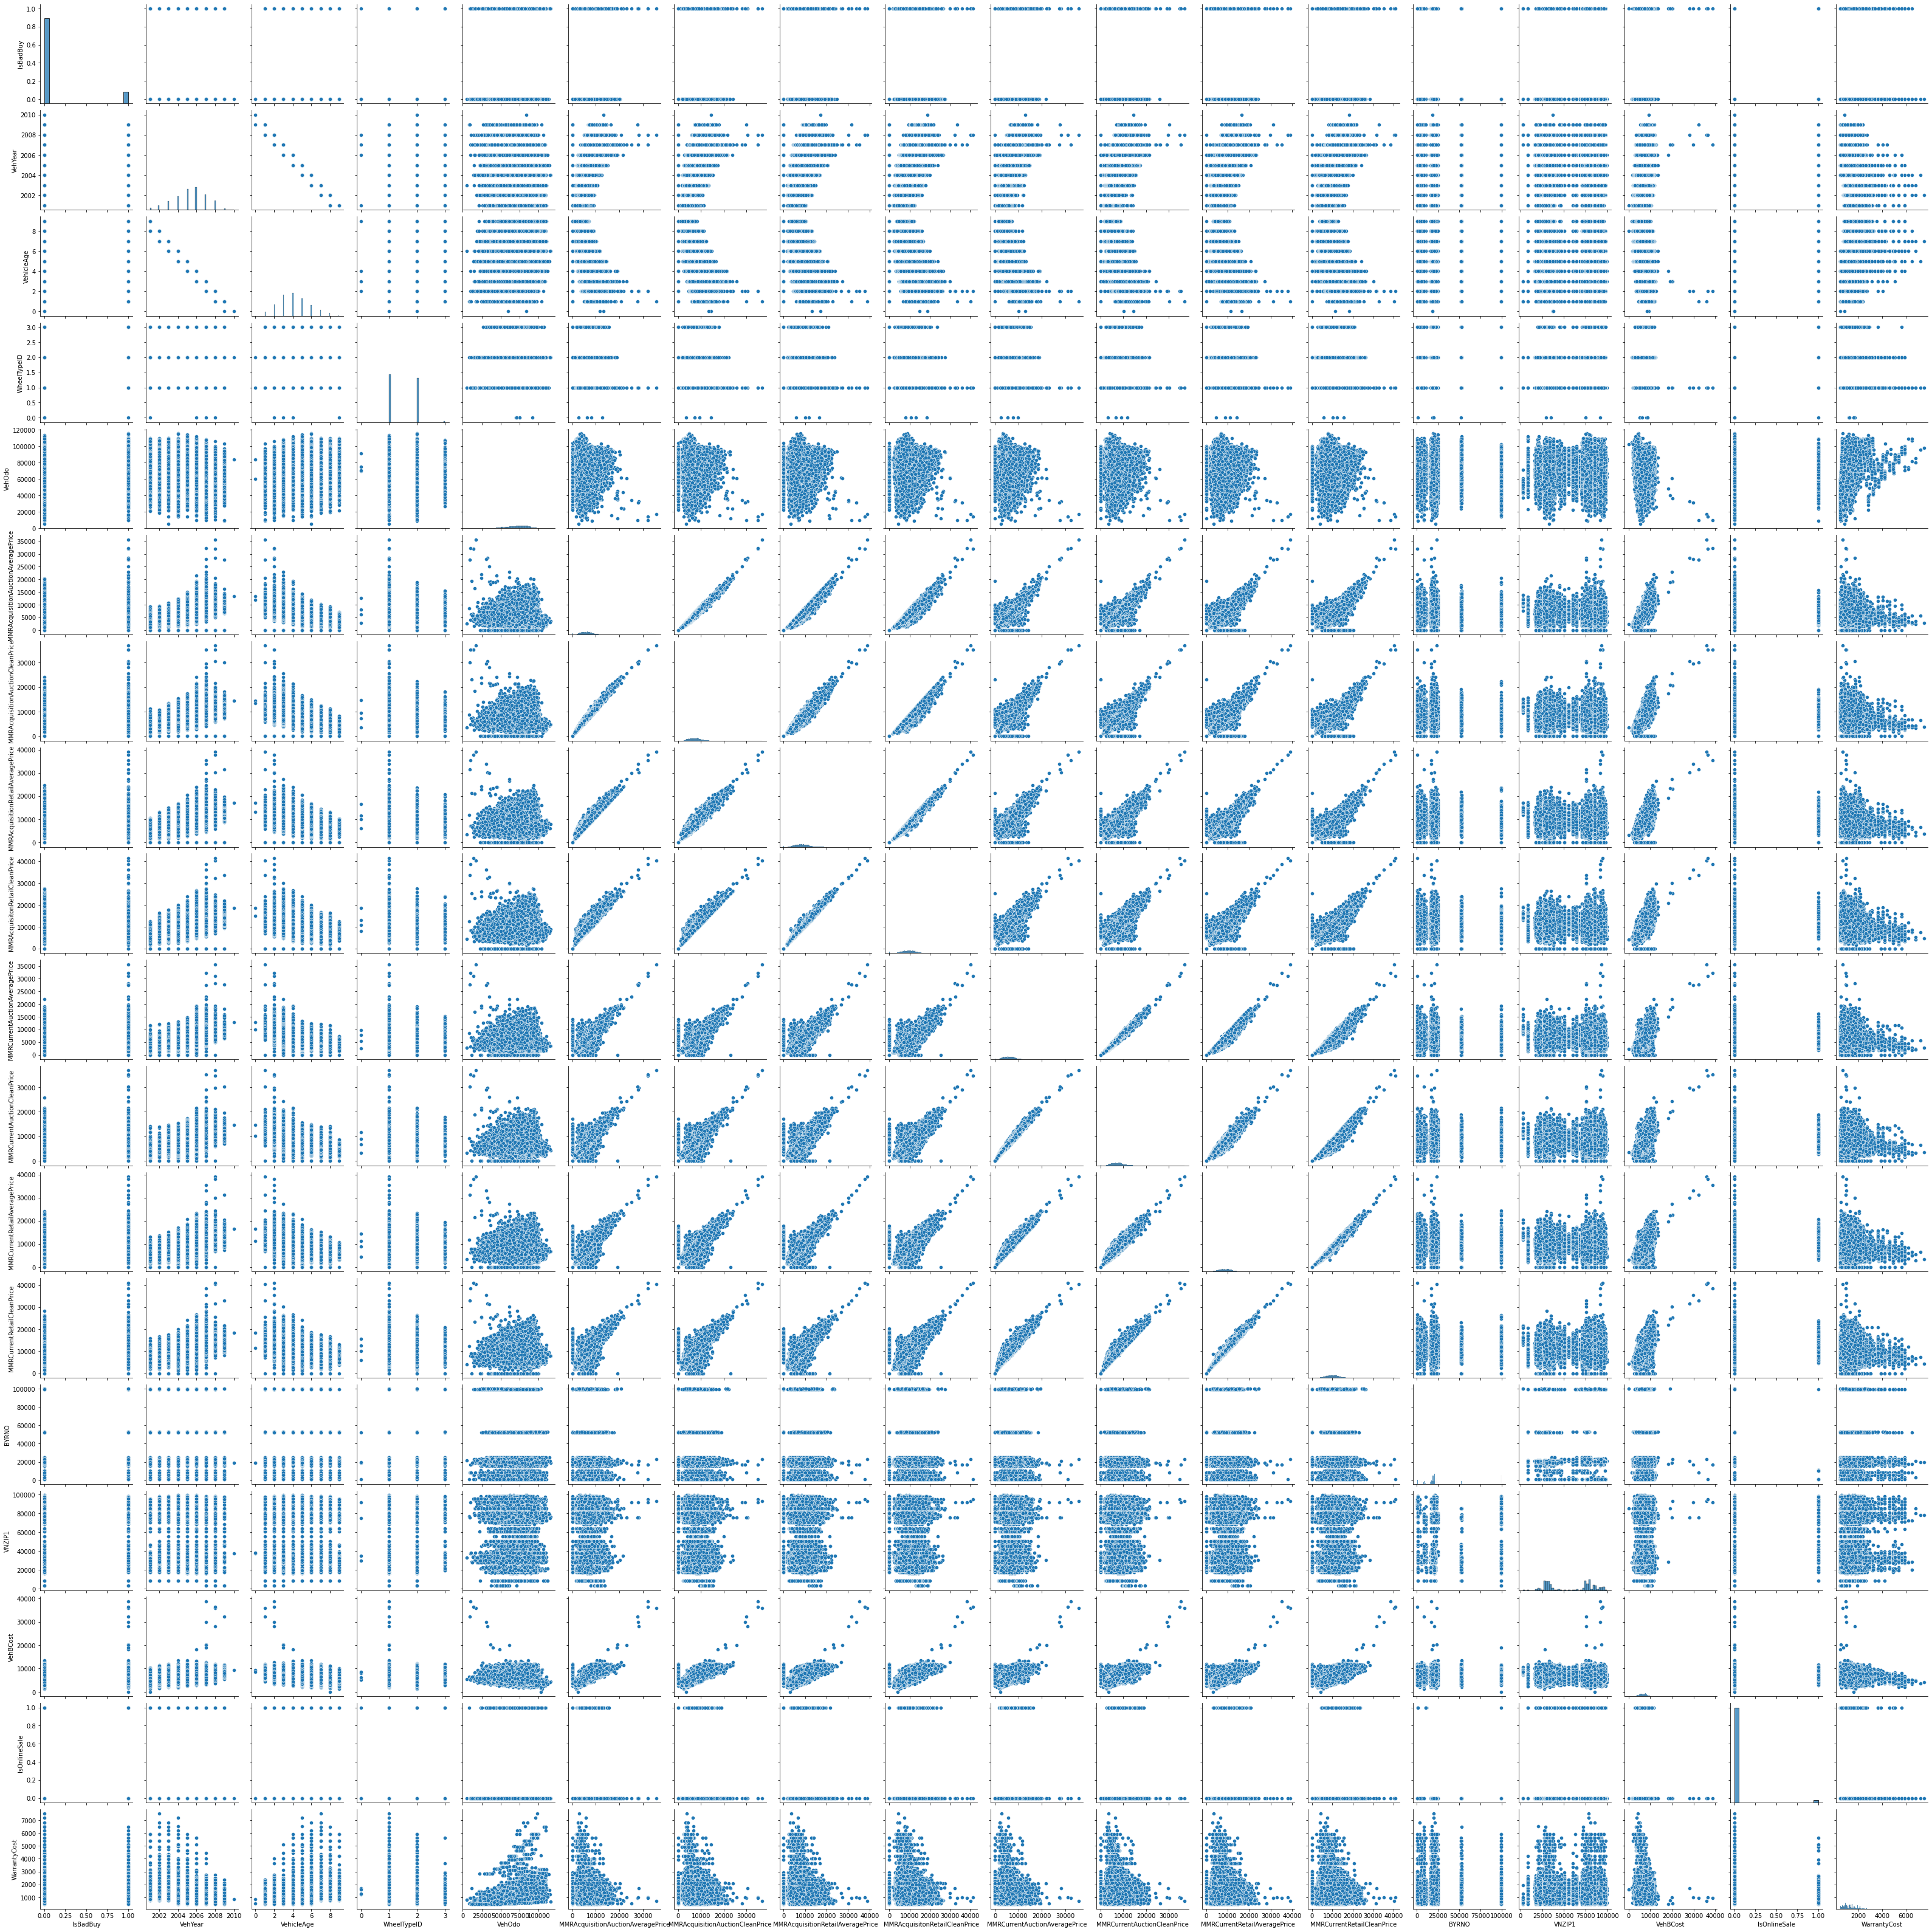

In [9]:
display(sns.pairplot(df_first_glance))

## Numerical Columns

### Plotting the distribution of all numerical columns

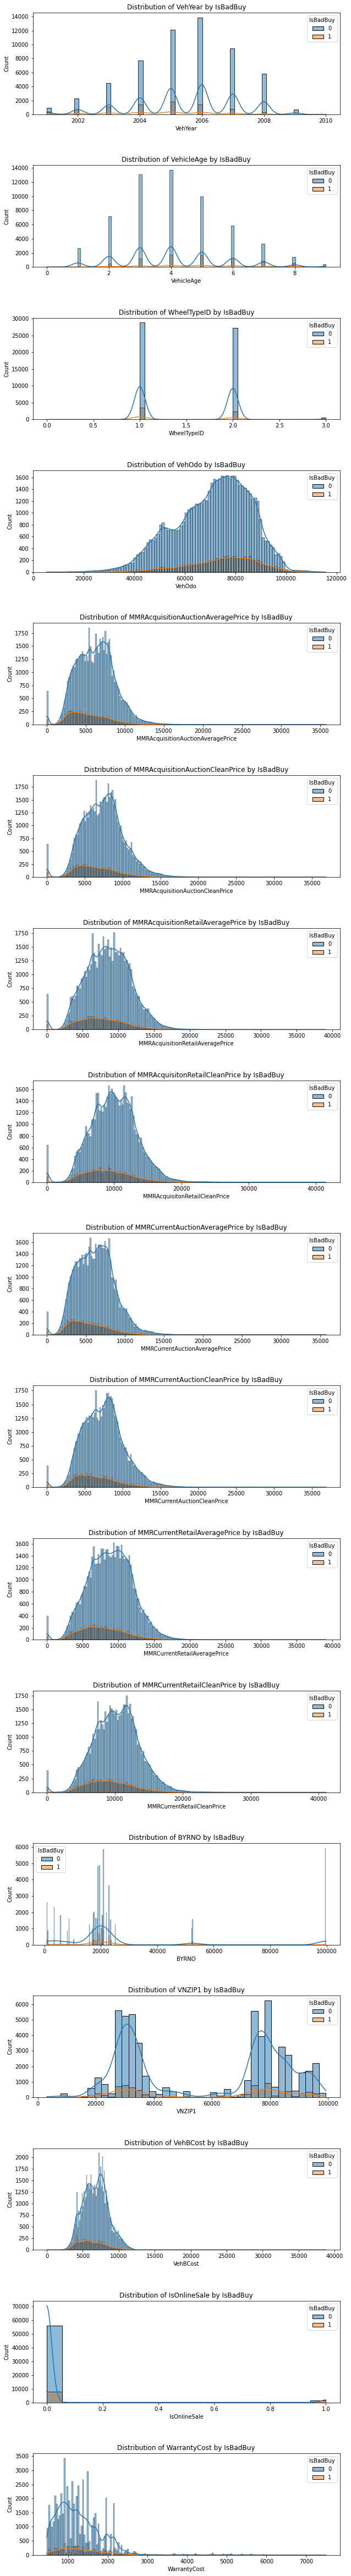

In [10]:
#continuous features
cont_features= df_first_glance.select_dtypes(include=["float64", "int64"])

n_features = len(cont_features.columns) - 1  # Excluding the target column
fig, axes = plt.subplots(n_features, 1, figsize=(10, 5 * n_features))  # Adjust size based on the number of subplots

plt.subplots_adjust(hspace=0.5)

# Plot each feature's histogram with hue set to the target column
for i, feature in enumerate(cont_features.columns[1:]):  # Loop over feature columns
    sns.histplot(data=df_first_glance, x=feature, hue='IsBadBuy', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by {df_first_glance.columns[0]}')


### Showing the correlations numericly on a heatmap

<AxesSubplot:>

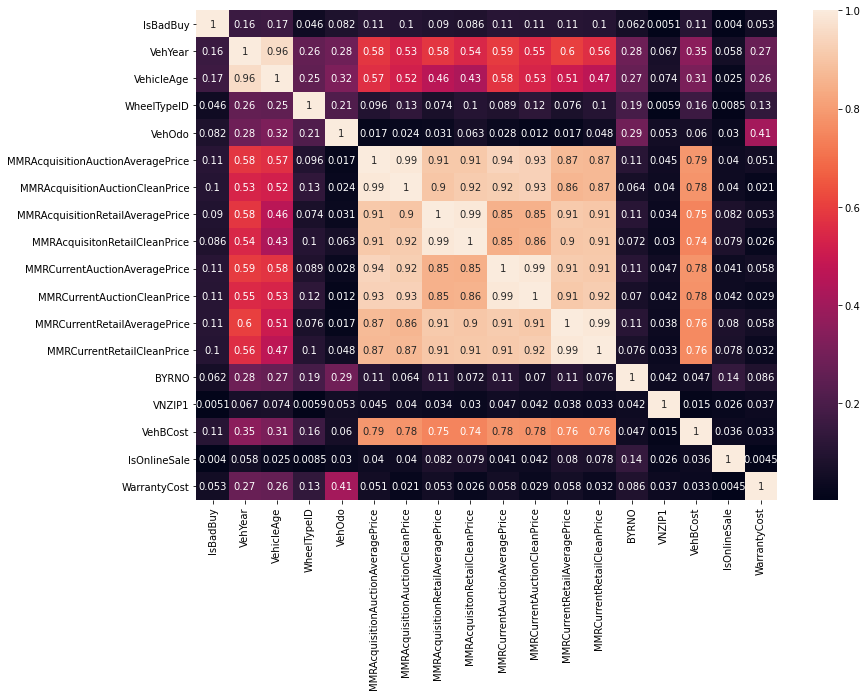

In [11]:
#checking for correlations in the cont features, cause the metric needs numerical values

plt.figure(figsize=(13, 9))
corr= cont_features.corr()
sns.heatmap(corr.abs(), annot=True)

#good idea to see the negative and positiv correlation

### Aiming for Outliers via sns.boxplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'IsBadBuy'),
  Text(1, 0, 'VehYear'),
  Text(2, 0, 'VehicleAge'),
  Text(3, 0, 'WheelTypeID'),
  Text(4, 0, 'VehOdo'),
  Text(5, 0, 'MMRAcquisitionAuctionAveragePrice'),
  Text(6, 0, 'MMRAcquisitionAuctionCleanPrice'),
  Text(7, 0, 'MMRAcquisitionRetailAveragePrice'),
  Text(8, 0, 'MMRAcquisitonRetailCleanPrice'),
  Text(9, 0, 'MMRCurrentAuctionAveragePrice'),
  Text(10, 0, 'MMRCurrentAuctionCleanPrice'),
  Text(11, 0, 'MMRCurrentRetailAveragePrice'),
  Text(12, 0, 'MMRCurrentRetailCleanPrice'),
  Text(13, 0, 'BYRNO'),
  Text(14, 0, 'VNZIP1'),
  Text(15, 0, 'VehBCost'),
  Text(16, 0, 'IsOnlineSale'),
  Text(17, 0, 'WarrantyCost')])

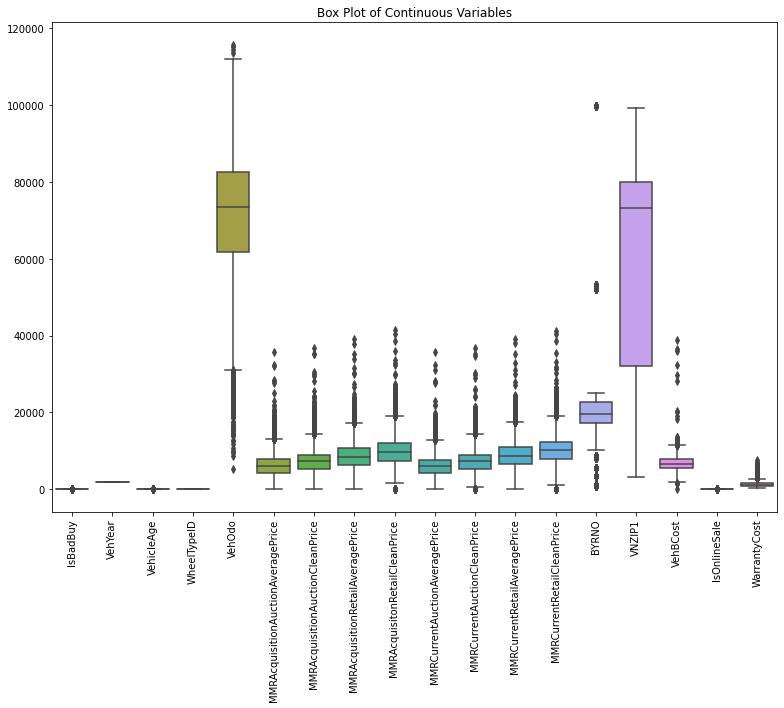

In [12]:
plt.figure(figsize=(13, 9))
sns.boxplot(data=cont_features)
plt.title('Box Plot of Continuous Variables')
plt.xticks(rotation=90)

#box plots all in one having the same scale

(array([0, 1]), [Text(0, 0, 'VehicleAge'), Text(1, 0, 'WheelTypeID')])

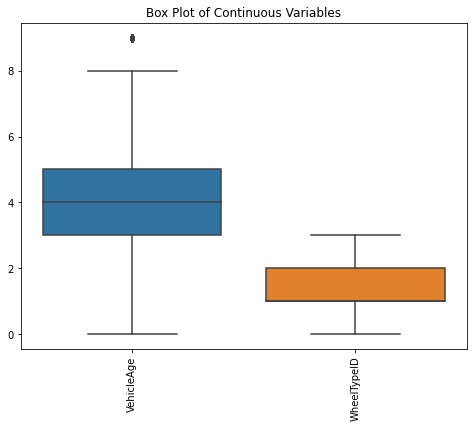

In [13]:
cont_features_little_ones= df_first_glance.loc[:, ["VehicleAge", "WheelTypeID"]]
plt.figure(figsize=(8, 6))
sns.boxplot(data=cont_features_little_ones)
plt.title('Box Plot of Continuous Variables')
plt.xticks(rotation=90)

In [14]:
#check the differences in meaning of the columns to the target vectors categories
df_first_glance.groupby("IsBadBuy").mean()

VehYear  VehicleAge  WheelTypeID        VehOdo  \
IsBadBuy                                                       
0         2005.448362    4.068364     1.502356  71055.213732   
1         2004.613154    4.932873     1.422230  74704.771964   

          MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
IsBadBuy                                                                       
0                               6229.380615                      7477.738465   
1                               5401.669999                      6614.855362   

          MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
IsBadBuy                                                                    
0                              8604.391068                    9960.688482   
1                              7744.996791                    9077.595705   

          MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
IsBadBuy                                                               
0                           6233.071194                  7496.609044   
1                           5413.194231                  6634.029215   

          MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice  \
IsBadBuy                                                             
0                          8899.595979                10272.842765   
1                          7907.029958                 9246.307873   

                 BYRNO        VNZIP1     VehBCost  IsOnlineSale  WarrantyCost  
IsBadBuy                                                                       
0         26964.498018  58040.478702  6796.855771      0.025471   1265.374609  
1         22098.212364  58445.141535  6234.206159      0.023569   1362.551209

## Categorical Outliers

In [15]:
#creating a df out ofCategorical Features
cat_features=df_first_glance.select_dtypes(include="object")

In [16]:
#convert from object to category

for col in cat_features:
    df_first_glance[col]= df_first_glance[col].astype("category")

In [17]:
df_first_glance.dtypes

IsBadBuy                                      int64
PurchDate                            datetime64[ns]
Auction                                    category
VehYear                                       int64
VehicleAge                                    int64
Make                                       category
Model                                      category
Trim                                       category
SubModel                                   category
Color                                      category
Transmission                               category
WheelTypeID                                 float64
WheelType                                  category
VehOdo                                        int64
Nationality                                category
Size                                       category
TopThreeAmericanName                       category
MMRAcquisitionAuctionAveragePrice           float64
MMRAcquisitionAuctionCleanPrice             float64
MMRAcquisiti

### checking for Sum of unique values, Unique values in column and Value counts in column

In [18]:
#looping through the columns
for col in cat_features:
    print("\n For",col)
    print(f"\n Sum of unique values:")
    print(len(df_first_glance[col].unique()))  
    print(f"\n Unique values in column") # '{col}':")
    print(df_first_glance[col].unique())
    
    print(f"\nValue counts in column")# '{col}':")
    print(df_first_glance[col].value_counts())


 For Auction

 Sum of unique values:
3

 Unique values in column
['OTHER', 'ADESA', 'MANHEIM']
Categories (3, object): ['OTHER', 'ADESA', 'MANHEIM']

Value counts in column
MANHEIM    36907
OTHER      15675
ADESA      13038
Name: Auction, dtype: int64

 For Make

 Sum of unique values:
29

 Unique values in column
['KIA', 'SUZUKI', 'CHEVROLET', 'CHRYSLER', 'NISSAN', ..., 'VOLVO', 'VOLKSWAGEN', 'SUBARU', 'ACURA', 'LEXUS']
Length: 29
Categories (29, object): ['KIA', 'SUZUKI', 'CHEVROLET', 'CHRYSLER', ..., 'VOLKSWAGEN', 'SUBARU', 'ACURA', 'LEXUS']

Value counts in column
CHEVROLET     15581
DODGE         11597
FORD          10167
CHRYSLER       7953
PONTIAC        3823
KIA            2243
SATURN         1968
NISSAN         1860
HYUNDAI        1605
JEEP           1477
SUZUKI         1196
TOYOTA         1018
MITSUBISHI      922
MAZDA           883
MERCURY         810
BUICK           656
GMC             578
HONDA           451
OLDSMOBILE      215
ISUZU           125
VOLKSWAGEN      119
SCIO

In [19]:
df_first_glance_cat= df_first_glance.loc[:, cat_features.columns]
df_first_glance_cat.loc[:, "IsBadBuy"]= df_first_glance.IsBadBuy

In [20]:
df_first_glance_cat.head()

Auction       Make                 Model Trim        SubModel   Color  \
0    OTHER        KIA               SPECTRA  NaN     4D SEDAN EX   BLACK   
1    ADESA     SUZUKI   FORENZA 2.0L I4 EFI   EX        4D WAGON  SILVER   
2    OTHER  CHEVROLET                COBALT   LT     2D COUPE LT     RED   
3  MANHEIM  CHEVROLET   VENTURE FWD V6 3.4L   LS  PASSENGER 3.4L  SILVER   
4  MANHEIM   CHRYSLER  TOWN & COUNTRY 2WD V  Bas    MINIVAN 3.3L     RED   

  Transmission WheelType  Nationality     Size TopThreeAmericanName PRIMEUNIT  \
0       MANUAL     Alloy  OTHER ASIAN   MEDIUM                OTHER       NaN   
1         AUTO    Covers  OTHER ASIAN   MEDIUM                OTHER       NaN   
2         AUTO     Alloy     AMERICAN  COMPACT                   GM       NaN   
3         AUTO    Covers     AMERICAN      VAN                   GM       NaN   
4         AUTO     Alloy     AMERICAN      VAN             CHRYSLER       NaN   

  AUCGUART VNST  IsBadBuy  
0      NaN   AL         0  
1      NaN   TX         0  
2      NaN   UT         1  
3      NaN   FL         0  
4      NaN   AZ         0

In [21]:
# creating a glance of the importance of the missing values, 
#by checking if there is an Value or not how does that impact the target vector
col_with_high_amount_of_NAN_cat= ["Trim", "WheelType", "PRIMEUNIT", "AUCGUART"]

for col in col_with_high_amount_of_NAN_cat:
    display(df_first_glance_cat.groupby(df_first_glance_cat[col].isnull()).mean())
    
#conclusion: WheelType has the following information= 
#if the value is missing, the chance to be a „lemon“ is 0.7 out of 1.0
#else if the value is there, it is most likely not a lemon
#thats for it should be transformed to binary feature

IsBadBuy
Trim           
False  0.122367
True   0.157769

IsBadBuy
WheelType          
False      0.096919
True       0.703163

IsBadBuy
PRIMEUNIT          
False      0.037913
True       0.127723

IsBadBuy
AUCGUART          
False     0.037913
True      0.127723

In [22]:
mask= df_first_glance_cat.loc[:, "PRIMEUNIT"] == "NO"
amount_of_no_s= df_first_glance_cat[mask]
amount_of_no_s.groupby("PRIMEUNIT").mean()


IsBadBuy
PRIMEUNIT          
NO         0.036952
YES             NaN

In [23]:
mask= df_first_glance_cat.loc[:, "PRIMEUNIT"] == "YES"
amount_of_no_s= df_first_glance_cat[mask]
amount_of_no_s.groupby("PRIMEUNIT").mean()


IsBadBuy
PRIMEUNIT          
NO              NaN
YES        0.090909

In [24]:
mask= df_first_glance_cat.loc[:, "AUCGUART"] == "GREEN"
amount_of_no_s= df_first_glance_cat[mask]
amount_of_no_s.groupby("AUCGUART").mean()


IsBadBuy
AUCGUART          
GREEN     0.036508
RED            NaN

In [25]:
mask= df_first_glance_cat.loc[:, "AUCGUART"] == "RED"
amount_of_no_s= df_first_glance_cat[mask]
amount_of_no_s.groupby("AUCGUART").mean()

IsBadBuy
AUCGUART          
GREEN          NaN
RED        0.09589

In [26]:
mask= df_first_glance_cat.loc[:, "AUCGUART"] == "GREEN"
amount_of_no_s= df_first_glance_cat[mask]
amount_of_no_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3013 entries, 9 to 65609
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Auction               3013 non-null   category
 1   Make                  3013 non-null   category
 2   Model                 3013 non-null   category
 3   Trim                  2922 non-null   category
 4   SubModel              3013 non-null   category
 5   Color                 3013 non-null   category
 6   Transmission          3013 non-null   category
 7   WheelType             2993 non-null   category
 8   Nationality           3013 non-null   category
 9   Size                  3013 non-null   category
 10  TopThreeAmericanName  3013 non-null   category
 11  PRIMEUNIT             3013 non-null   category
 12  AUCGUART              3013 non-null   category
 13  VNST                  3013 non-null   category
 14  IsBadBuy              3013 non-null   int64   
dtypes: 

### Note: 
I considerd those columns as very little important for this set, cause of the little amount of data to train the model and this gathered data insights.

But they could contain important information and could be considerd for feature-engineering

## Plotting categorical_columns to visualize the relationship between the predictors and the target

<Figure size 432x288 with 0 Axes>

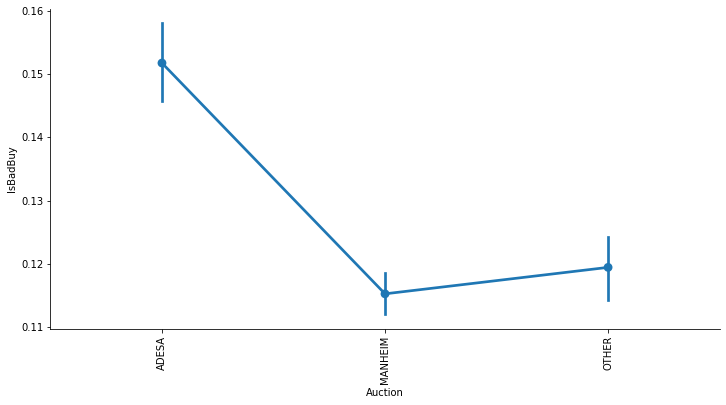

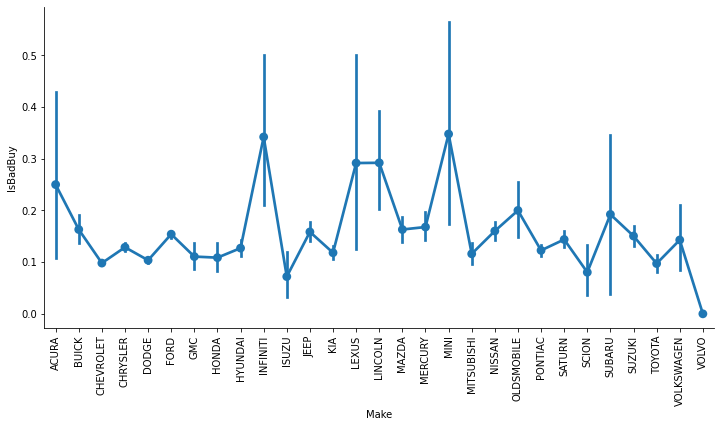

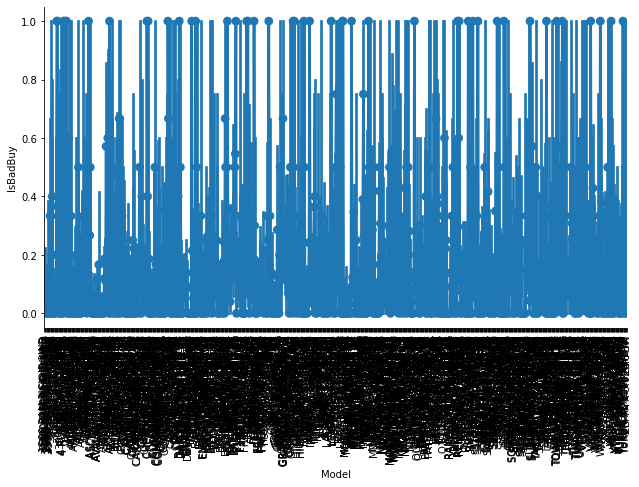

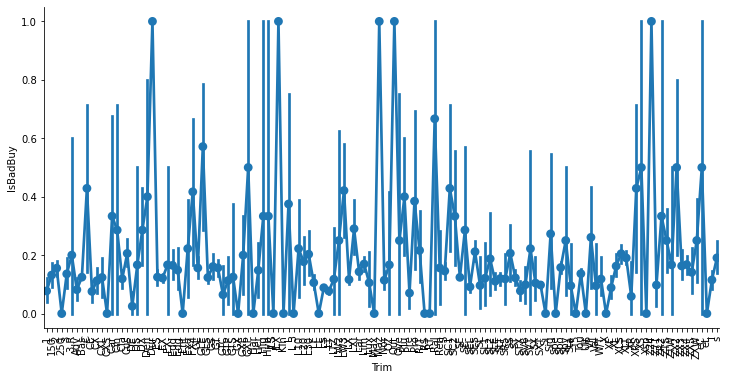

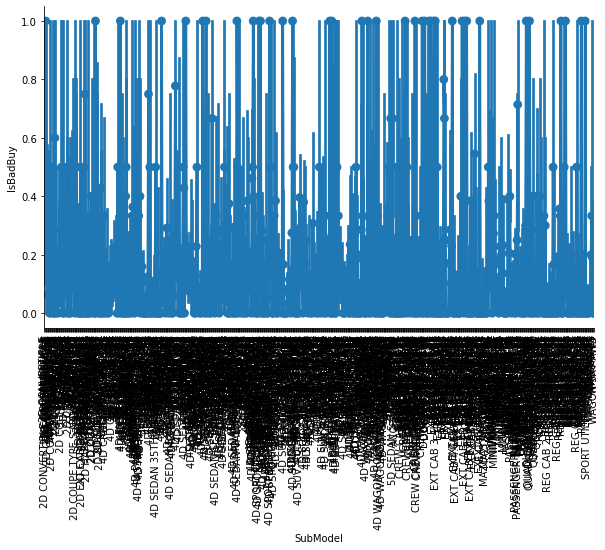

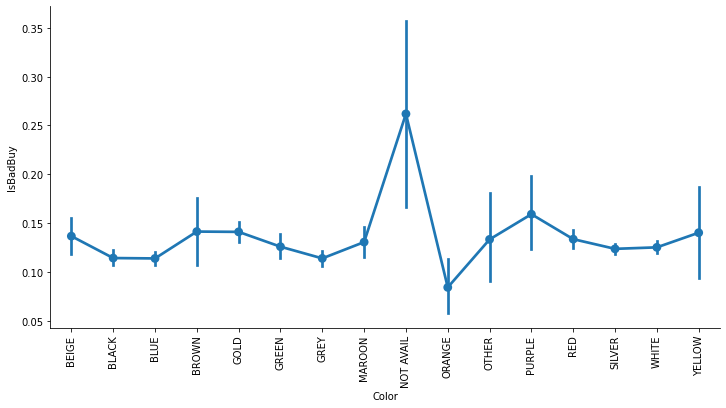

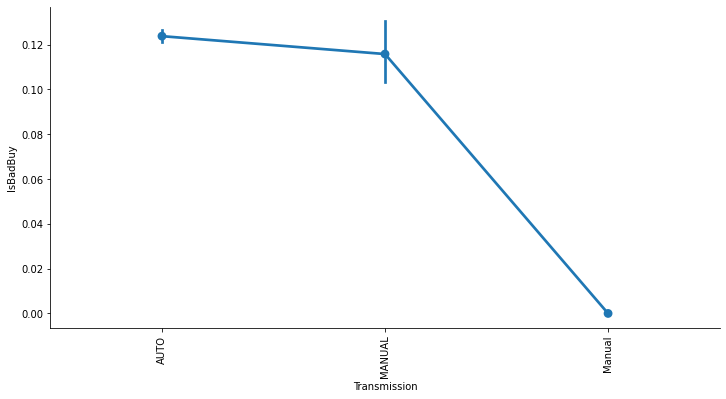

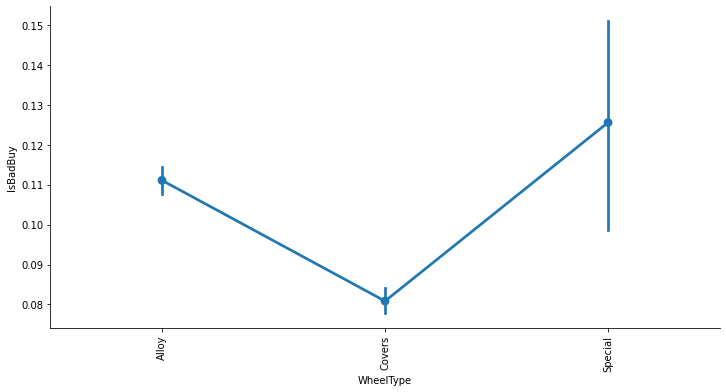

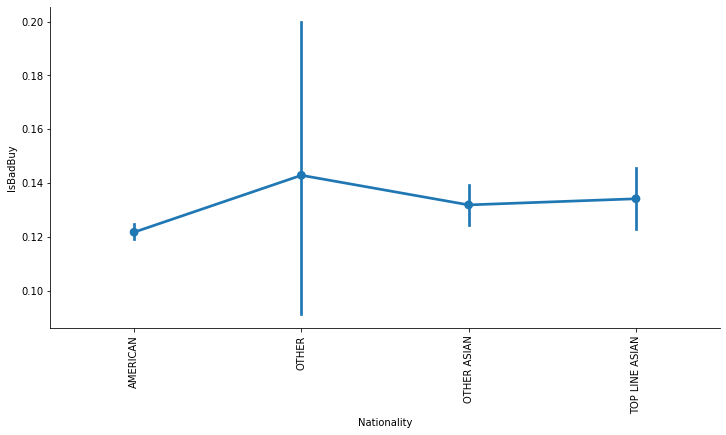

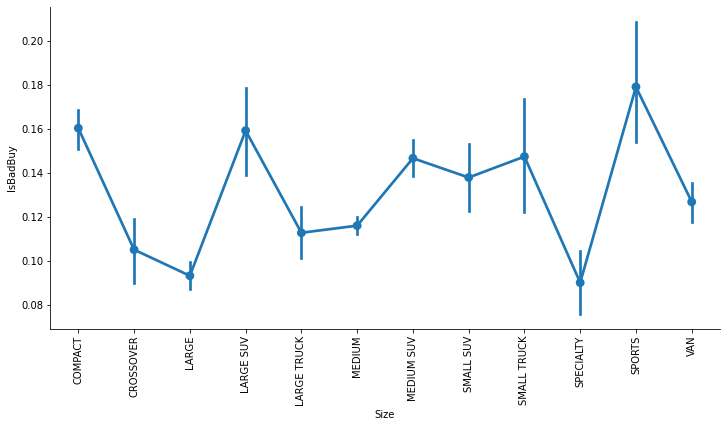

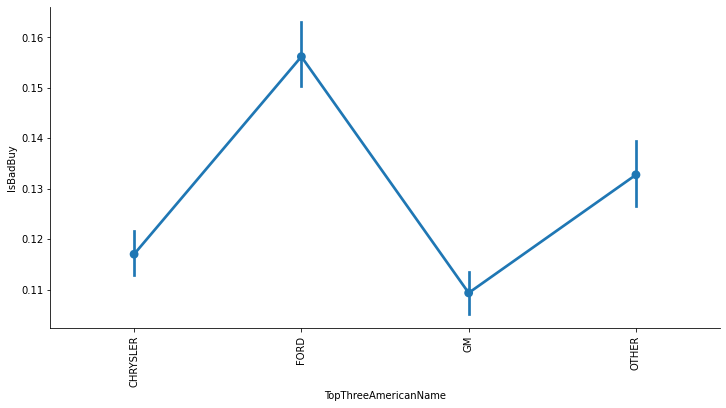

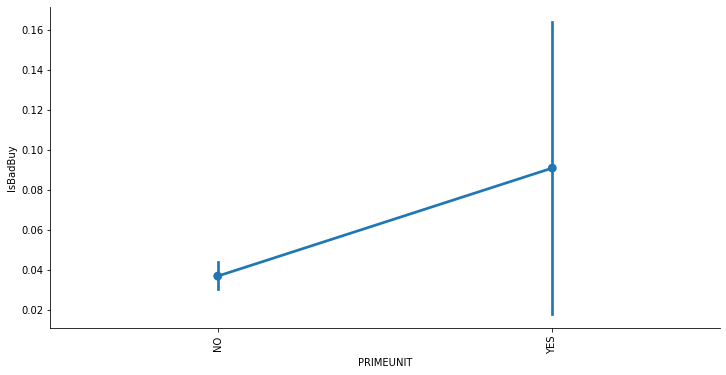

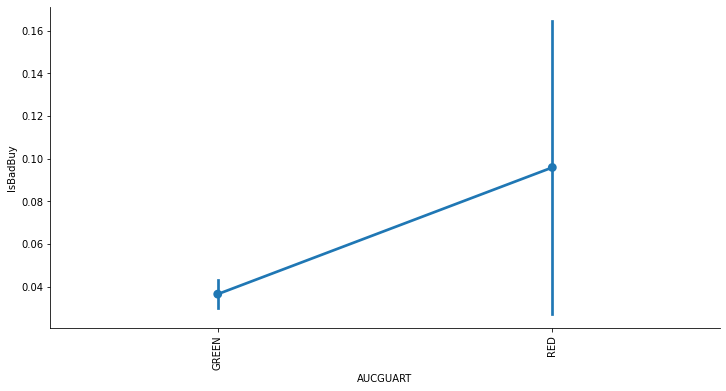

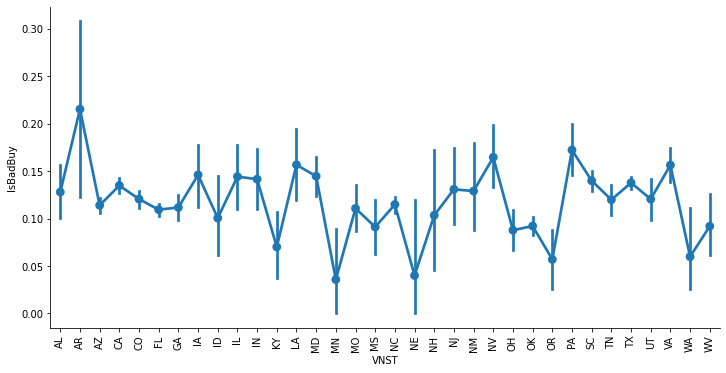

In [27]:
#looping through the cat_cols
for i, col in enumerate(df_first_glance_cat.columns[:-1]):
    plt.figure(i)
    sns.catplot(x=col, y="IsBadBuy", data=df_first_glance_cat, kind= "point", aspect=2)
    plt.xticks(rotation=90)
#imbalnce of set displaying in the plot

## Visualizing the balance of the set

Text(0.5, 1.0, 'Overall distribution of IsBadBuy')

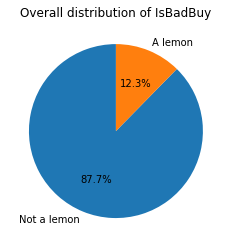

In [28]:
#using PiePlot
value_counts_IsBadBuy_all= df_first_glance.IsBadBuy.value_counts()
fig, ax= plt.subplots()
ax.pie(value_counts_IsBadBuy_all, labels=["Not a lemon", "A lemon"], startangle=90, autopct='%1.1f%%')
ax.set_title("Overall distribution of IsBadBuy")

## Experimenting with PCA for dimensional reduction

In [29]:
#using PCA du reduce the correlated columns
#not rly nessecary cause they are in the same scale
scaler = StandardScaler()
pca = PCA(n_components=1, random_state=42)

std_pca = Pipeline([("std", scaler),
                    ("pca", pca)])

col_correlated= ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']


In [30]:
df_first_glance_dropped_na= df_first_glance.copy()
df_first_glance_dropped_na= df_first_glance_dropped_na.drop(columns=["PRIMEUNIT", "AUCGUART"], axis=1)
df_first_glance_dropped_na= df_first_glance_dropped_na.dropna()

In [31]:
features_dropped_na= df_first_glance_dropped_na.drop(columns="IsBadBuy", axis=1)
arr_prices_cor= std_pca.fit_transform(features_dropped_na.loc[:, col_correlated])
arr_prices_cor.shape

(60430, 1)

### Note:
this will be added as new series to the data frame and the other columns will be dropped

In [32]:
col_correlated_lvled= ["VehYear", "VehicleAge"]
pca = PCA(n_components=0.95, random_state=42) #will not be part of the pipeline, cause i put as object into the pipeline

features_dropped_na= df_first_glance_dropped_na.drop(columns="IsBadBuy", axis=1)
arr_prices_cor= std_pca.fit_transform(features_dropped_na.loc[:, col_correlated_lvled])
arr_prices_cor.shape

#will be the even better option

(60430, 1)

## Searching for Outliers

### In two numerical columns

In [33]:
#using RANSAC
d_distance = mad(df_first_glance.loc[:, 'VehicleAge']) * 3

model_outlier = RANSACRegressor(residual_threshold=d_distance, random_state=0)
model_outlier.fit(X=df_first_glance.loc[:, ['VehYear']], y=df_first_glance.loc[:, 'VehicleAge'])

RANSACRegressor(random_state=0, residual_threshold=4.447806655516806)

<AxesSubplot:xlabel='VehicleAge', ylabel='VehYear'>

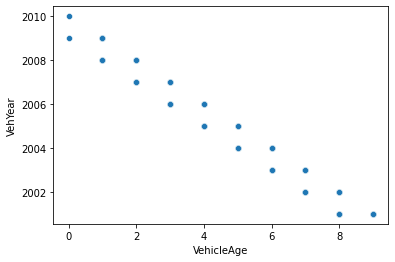

In [34]:
ax = sns.scatterplot(x=df_first_glance.loc[model_outlier.inlier_mask_, 'VehicleAge'],
                     y=df_first_glance.loc[model_outlier.inlier_mask_, 'VehYear'])

sns.scatterplot(x=df_first_glance.loc[~model_outlier.inlier_mask_, 'VehicleAge'],
                y=df_first_glance.loc[~model_outlier.inlier_mask_, 'VehYear'],
                color='orange', 
                ax=ax)

#it looks like there are no outliers(?)

### In two categorical columns

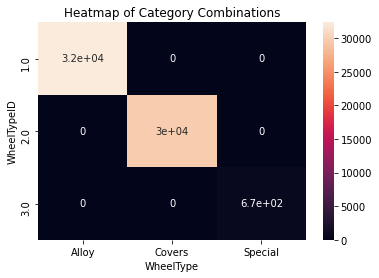

In [35]:
#checking for oultiers via a heatmap
contingency_table = pd.crosstab(df_first_glance['WheelTypeID'], df_first_glance['WheelType'])
sns.heatmap(contingency_table, annot=True)
plt.title('Heatmap of Category Combinations')
plt.show()

# dont we see just three cluster? two big and one smaller one?, well, but the amount of the others should declare them as outliers.

## Testing a bit

### trying to oneHotEncode the cat_cols and then use PCA on the new columns, to reduce the huge amount of new features

In [36]:
#apply oneHotEncoder to the whole df, drop "SubModel", "Model", "Trim", cause they are too big
#dropping "PRIMEUNIT", "AUCGUART", cause of they huge amount of missing data
#removing all missing values, to get a maybe more pure training base
#dropping the target vector "IsBadBuy"
#dropping the column "PurchDate", cause of the dtype
#apply PCA to this df and check how many columns are needed to keep 90%

df_first_glance_whole_set_pca= df_first_glance.drop(["SubModel", "Model", "Trim","PRIMEUNIT", "AUCGUART", "IsBadBuy"], axis= 1)

In [37]:
df_first_glance_whole_set_pca.shape

(65620, 27)

In [38]:
df_first_glance_whole_set_pca= df_first_glance_whole_set_pca.dropna()

In [39]:
df_first_glance_whole_set_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62401 entries, 0 to 65619
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   PurchDate                          62401 non-null  datetime64[ns]
 1   Auction                            62401 non-null  category      
 2   VehYear                            62401 non-null  int64         
 3   VehicleAge                         62401 non-null  int64         
 4   Make                               62401 non-null  category      
 5   Color                              62401 non-null  category      
 6   Transmission                       62401 non-null  category      
 7   WheelTypeID                        62401 non-null  float64       
 8   WheelType                          62401 non-null  category      
 9   VehOdo                             62401 non-null  int64         
 10  Nationality                       

In [40]:
current_cat_col= df_first_glance_whole_set_pca.select_dtypes(include="category")

In [41]:
current_cat_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62401 entries, 0 to 65619
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Auction               62401 non-null  category
 1   Make                  62401 non-null  category
 2   Color                 62401 non-null  category
 3   Transmission          62401 non-null  category
 4   WheelType             62401 non-null  category
 5   Nationality           62401 non-null  category
 6   Size                  62401 non-null  category
 7   TopThreeAmericanName  62401 non-null  category
 8   VNST                  62401 non-null  category
dtypes: category(9)
memory usage: 1.0 MB


In [42]:
import pdpipe as pdp 
onehot= pdp.OneHotEncode(["Auction"], drop_first=False)
nr_of_new_cols= len(df_first_glance_whole_set_pca["Auction"].unique())
df_first_glance_whole_set_pca= onehot.fit_transform(df_first_glance_whole_set_pca)


In [43]:
df_first_glance_whole_set_pca.head(2)

PurchDate  VehYear  VehicleAge    Make   Color Transmission  WheelTypeID  \
0 2009-11-11     2007           2     KIA   BLACK       MANUAL          1.0   
1 2009-01-07     2005           4  SUZUKI  SILVER         AUTO          2.0   

  WheelType  VehOdo  Nationality  ... MMRCurrentRetailCleanPrice  BYRNO  \
0     Alloy   35547  OTHER ASIAN  ...                    10428.0   5546   
1    Covers   72131  OTHER ASIAN  ...                     5978.0  20207   

   VNZIP1  VNST  VehBCost  IsOnlineSale  WarrantyCost  Auction_ADESA  \
0   35004    AL    6400.0             0           462              0   
1   77086    TX    3870.0             0           569              1   

   Auction_MANHEIM  Auction_OTHER  
0                0              1  
1                0              0  

[2 rows x 29 columns]

In [44]:
feature_out_of_new_cols_to_perform_pca_on= df_first_glance_whole_set_pca.iloc[:,-(nr_of_new_cols):]

In [45]:
feature_out_of_new_cols_to_perform_pca_on.shape

(62401, 3)

In [46]:
feature_out_of_new_cols_to_perform_pca_on.sum()

Auction_ADESA      11935
Auction_MANHEIM    35997
Auction_OTHER      14469
dtype: int64

In [47]:
pca = PCA(n_components=0.95, random_state=42)

arr_auction_pca= std_pca.fit_transform(feature_out_of_new_cols_to_perform_pca_on)
arr_auction_pca.shape
#they need to be added to dataframe and 
#pca as a step in a pipeline is nested in there and if i want to use it i have to keep this in mind

(62401, 1)

## Training/test split

In this project you need the training data as well as the test and target data. 

We haven't specified the test data for you. So at this point, we recommend that you split the data into a training and test data set, and work with the **training set** as if this were all the data you have available.
Once you've finished building your model, you can use the **test set** to simulate what happens when new data enters your data pipeline, for example, when new cars go on sale on auction platforms.

Remember, **only ever fit to the training set!** This also applies for data cleaning and feature engineering. Ideally, you should only touch your test set once, after you've built and evaluated the best model for you and want to know how well it performs on new data. Just pretend you don't have the test set.

Use `train_test_split` from the submodule `sklearn.model_selection` to split the data into test and training data sets. Pass the following parameters: `random_state = 42, test_size = 0.1` so that you can later compare your predictions with our model and get an initial estimate. Also save `features_test` as *features_test.csv*.


In [48]:
# perform train-test-split
from sklearn.model_selection import train_test_split

df= pd.read_csv("data_train.csv")

features= df.drop("IsBadBuy", axis=1)
target= df.IsBadBuy

features_train, features_test, target_train, target_test= train_test_split(features,
                                                                           target,
                                                                           random_state=42,
                                                                           test_size=0.1)

In [49]:
# save features_test as 'features_test.csv'
features_test.to_csv("features_test.csv", index=False)

## Data preparation


The goal of data preparation is to find a way to clean the data sets for your model (*Data Cleaning*) and to put them into a readable format for your model (*Datatype Transformation*). Once you've completed these steps, you can begin to select a training set that is as representative as possible (sampling).


### Transforming data types


### At the end i will have a cleaned DataFrame with no NAN, and just 'category' and 'int32' dtypes

In [50]:
#copy target_train
df = features_train.copy()

In [51]:
target_train.head()

21430    0
53433    0
13278    0
29356    0
28157    0
Name: IsBadBuy, dtype: int64

In [52]:
df.head()

PurchDate  Auction  VehYear  VehicleAge       Make  \
21430  1244073600    OTHER     2004           5  CHEVROLET   
53433  1253750400    OTHER     2007           2        KIA   
13278  1248739200    OTHER     2006           3    PONTIAC   
29356  1240876800  MANHEIM     2005           4        GMC   
28157  1287014400  MANHEIM     2007           3       FORD   

                      Model Trim         SubModel   Color Transmission  ...  \
21430   VENTURE FWD V6 3.4L   LS   PASSENGER 3.4L   GREEN         AUTO  ...   
53433       RIO 1.6L I4 MPI  Bas         4D SEDAN  SILVER         AUTO  ...   
13278     G6 V6 3.5L V6 SFI  Bas         4D SEDAN   WHITE         AUTO  ...   
29356  ENVOY 2WD 6C 4.2L I6  SLE  4D UTILITY 4.2L    GREY         AUTO  ...   
28157          FIVE HUNDRED  SEL     4D SEDAN SEL     RED         AUTO  ...   

       MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT  \
21430                        4284.0                     5951.0        NaN   
53433                        4887.0                     5790.0        NaN   
13278                        7550.0                     9151.0        NaN   
29356                        9782.0                    11193.0        NaN   
28157                       10925.0                    12565.0        NaN   

      AUCGUART  BYRNO VNZIP1  VNST  VehBCost  IsOnlineSale  WarrantyCost  
21430      NaN  99750  39208    MS    4700.0             0          4622  
53433      NaN   3453  80229    CO    5255.0             0           533  
13278      NaN  21053  95673    CA    7305.0             0          1272  
29356      NaN   5546  34761    FL    9300.0             0          1020  
28157      NaN   1231  89120    NV    6955.0             1          1774  

[5 rows x 32 columns]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59058 entries, 21430 to 15795
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          59058 non-null  int64  
 1   Auction                            59058 non-null  object 
 2   VehYear                            59058 non-null  int64  
 3   VehicleAge                         59058 non-null  int64  
 4   Make                               59058 non-null  object 
 5   Model                              59058 non-null  object 
 6   Trim                               57187 non-null  object 
 7   SubModel                           59051 non-null  object 
 8   Color                              59051 non-null  object 
 9   Transmission                       59050 non-null  object 
 10  WheelTypeID                        56454 non-null  float64
 11  WheelType                          56450 non-null 

In [54]:
df.loc[:, "PurchDate"]= pd.to_datetime(df.loc[:, "PurchDate"], unit='s')
df["PurchYear"]= df["PurchDate"].dt.year
df["PurchMonth"]= df["PurchDate"].dt.month
df["PurchDay"]= df["PurchDate"].dt.day
df= df.drop("PurchDate", axis=1)

In [55]:
df.isna().sum()

Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1871
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2604
WheelType                             2608
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       15
MMRAcquisitionAuctionCleanPrice         15
MMRAcquisitionRetailAveragePrice        15
MMRAcquisitonRetailCleanPrice           15
MMRCurrentAuctionAveragePrice          261
MMRCurrentAuctionCleanPrice            261
MMRCurrentRetailAveragePrice           261
MMRCurrentRetailCleanPrice             261
PRIMEUNIT  

### Data imputation


In contrast to the last project there are relatively many missing values in the data. This also applies to the test and target data. For the test and target data, you should classify **every** data point. So you shouldn't remove any data points from them because of missing or improbable values. Instead, you could replace the missing values or remove features with many missing values.

**Tip**: You cannot assume that missing values in *features_aim.csv* are in the same columns as in *data_train.csv*. So you need strategies for each column. To fill the missing  values of multiple columns with different values at the same time, you can pass a `dict` to the `my_df.fillna()` method, with *keys* corresponding to the column names. The *values* are the corresponding values.


In [56]:
from sklearn.impute import KNNImputer

impute_knn= KNNImputer(n_neighbors=5)
col_num= df.select_dtypes(include=["float64", "int64"])
imputed_data= impute_knn.fit_transform(df[col_num.columns])

In [57]:
imputed_df= pd.DataFrame(imputed_data, columns=col_num.columns, index=df.index)

In [58]:
df= pd.concat([df.drop(columns=col_num), imputed_df], axis=1)

In [59]:
df.isna().sum()

Auction                                  0
Make                                     0
Model                                    0
Trim                                  1871
SubModel                                 7
Color                                    7
Transmission                             8
WheelType                             2608
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
PRIMEUNIT                            56273
AUCGUART                             56273
VNST                                     0
VehYear                                  0
VehicleAge                               0
WheelTypeID                              0
VehOdo                                   0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [60]:
df= df.drop(["PRIMEUNIT", "AUCGUART"], axis=1)

In [61]:
df.isna().sum()

Auction                                 0
Make                                    0
Model                                   0
Trim                                 1871
SubModel                                7
Color                                   7
Transmission                            8
WheelType                            2608
Nationality                             4
Size                                    4
TopThreeAmericanName                    4
VNST                                    0
VehYear                                 0
VehicleAge                              0
WheelTypeID                             0
VehOdo                                  0
MMRAcquisitionAuctionAveragePrice       0
MMRAcquisitionAuctionCleanPrice         0
MMRAcquisitionRetailAveragePrice        0
MMRAcquisitonRetailCleanPrice           0
MMRCurrentAuctionAveragePrice           0
MMRCurrentAuctionCleanPrice             0
MMRCurrentRetailAveragePrice            0
MMRCurrentRetailCleanPrice        

In [62]:
col_cat= df.select_dtypes(include="object")
for col in col_cat.columns:
    df[col]= df[col].astype("category")
    mode_category = df[col].mode()[0] 
    df[col] = df[col].fillna(mode_category)  
    
#hint not nan with mode reducen
#simpleImputer from sklearn, strategies is available

In [63]:
df.isna().sum()

Auction                              0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
VNST                                 0
VehYear                              0
VehicleAge                           0
WheelTypeID                          0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                   

In [64]:
df.dtypes

Auction                              category
Make                                 category
Model                                category
Trim                                 category
SubModel                             category
Color                                category
Transmission                         category
WheelType                            category
Nationality                          category
Size                                 category
TopThreeAmericanName                 category
VNST                                 category
VehYear                               float64
VehicleAge                            float64
WheelTypeID                           float64
VehOdo                                float64
MMRAcquisitionAuctionAveragePrice     float64
MMRAcquisitionAuctionCleanPrice       float64
MMRAcquisitionRetailAveragePrice      float64
MMRAcquisitonRetailCleanPrice         float64
MMRCurrentAuctionAveragePrice         float64
MMRCurrentAuctionCleanPrice       

In [65]:
for col in col_num:
    df[col]= df[col].astype(np.int32)

In [66]:
df.dtypes


Auction                              category
Make                                 category
Model                                category
Trim                                 category
SubModel                             category
Color                                category
Transmission                         category
WheelType                            category
Nationality                          category
Size                                 category
TopThreeAmericanName                 category
VNST                                 category
VehYear                                 int32
VehicleAge                              int32
WheelTypeID                             int32
VehOdo                                  int32
MMRAcquisitionAuctionAveragePrice       int32
MMRAcquisitionAuctionCleanPrice         int32
MMRAcquisitionRetailAveragePrice        int32
MMRAcquisitonRetailCleanPrice           int32
MMRCurrentAuctionAveragePrice           int32
MMRCurrentAuctionCleanPrice       

### Dealing with outliers


* Are there any outliers in the training set ? - How should you deal with them?


### Note: 
No outliers were detected in the EDA, so none will be removed

**Important:**
If you decide to delete outliers, only do this only in the training set. And **do not** add this step to your pipeline or cleaning function. Otherwise, you may not be able to get a prediction for every value in *features_aim* when you finish the project.


To easily reproduce your cleanup steps with the test and target data, you should define a function that performs the respective steps for you. Name your function `clean_data`. It should take the uncleaned `pandas.DataFrame` as an argument and output the cleaned `panda.DataFrame`. Make sure that no data points are deleted, because in the target data set, you should make a prediction for each value.


In [67]:
def clean_data(df):
    """Returns cleaned DataFrame.
    
    Transform datatypes:
        -transform "pickup_datetime" to datetime format and split it into 3 columns: 
        "PurchYear", "PurchMonth", "PurchDay"
        -transfrom all "object" to "category" and fills the missing values with mode()
    
    Dropping columns with high amount of missing values and columns with too many unique values
        - "PRIMEUNIT", "AUCGUART", "SubModel", "Model", "Trim"
    
        
    Args: 
        df (pd.DataFrame) : uncleaned DataFrame
        
    Returns:
        df  (pd.DataFrame) : cleaned DataFrame
    
    """
    #to datetime and split in into 3 columns: "PurchYear", "PurchMonth", "PurchDay"
    df.loc[:, "PurchDate"]= pd.to_datetime(df.loc[:, "PurchDate"], unit='s')
    df["PurchYear"]= df["PurchDate"].dt.year
    df["PurchMonth"]= df["PurchDate"].dt.month
    df["PurchDay"]= df["PurchDate"].dt.day
    df= df.drop("PurchDate", axis=1)
    
    ##missing values
    #dropping columns with high amount of missing values and columns with too many unique values
    #and cause of to many different values
    #(maybe for later improvements)
    df = df.drop(["PRIMEUNIT", "AUCGUART", "Trim", "Model", "SubModel"], axis=1)
    
    #to "category"
    col_cat = df.select_dtypes(include="object")
    for col in col_cat.columns:
        df[col] = df[col].astype("category")
       
    return df

#Wheeltype has to be label encoded

**Congratulations**:
You've cleaned your data and packed these steps into a function. So you can easily repeat the data cleaning if necessary.


### Resample


As you may have noticed, the target categories in the data set are very unbalanced. So it may be necessary to resample your training data set. In *Imbalanced Target Categories* (Module 2 Chapter 3) you learned about different resampling methods and also how to use `imblearn.pipeline` to test different sampling methods.


In [68]:
#for the beginning i just use the balanced attribut of the model

## Modeling


Now let's get to the core task of a Data Scientist, building machine learning models. As you have already learned in this course, optimizing a model is an iterative process. So you will certainly perform the following steps more than once.


### Build a simple baseline model


Before you now focus on creating and selecting new features, you should first see where to start your efforts and create a first simple model without any hyperparameter optimization. So you can always check afterwards whether the following model optimization steps result in an improvement. The best approach is to create a pipeline that does the modeling as well as encoding the non-numerical features. We suggest using the following steps:

1. Define numerical features (`num_cols`) and categorical features (`cat_cols`).
3. Select the algorithm for the baseline model and instantiate it as `model`.
3. Create pipeline (`model_baseline`) according to the outline below.
4. Use the cleaned and, if necessary, filtered `features_train` and the corresponding `target _train` to *fit*.
5. Make predictions based on `features_test` using `model_baseline`.





In [69]:
# define num_cols and cat_cols


In [70]:
# instantiate model


In [131]:
testing_pipeline_features_train= features_train.copy()
testing_pipeline_features_test= features_test.copy()
testing_pipeline_target_train= target_train.copy()
testing_pipeline_target_test= target_test.copy()

In [136]:
#building a pipeline modeled after Nils
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

# liste aller numerischen spalten die du verwenden möchtest (außer der pca spalten)
num_cols = ['VehYear',
            'VehicleAge',
            'WheelTypeID',
            'VehOdo',
            'BYRNO',
            'VehBCost',
            'WarrantyCost',
            'PurchYear',
            'PurchMonth',
            'PurchDay',
            'MMRAcquisitonRetailCleanPrice']

# liste aller categorischen spalten die du verwenden möchtest, 
#hier bitte nicht alle Features rein packen sondern eine vorauswahl treffen
cat_cols = ['Auction',
            'Color',
            'WheelType',
            'Make',
            'TopThreeAmericanName']

# list aller spalten die du in die pca stecken möchtest
pca_cols = ['MMRAcquisitionAuctionAveragePrice',
            'MMRAcquisitionAuctionCleanPrice',
            'MMRAcquisitionRetailAveragePrice',
            'MMRAcquisitonRetailCleanPrice',
            'MMRCurrentAuctionAveragePrice',
            'MMRCurrentAuctionCleanPrice',
            'MMRCurrentRetailAveragePrice',
            'MMRCurrentRetailCleanPrice']

# Define the preprocessing steps for numerical and categorical features

num_transformer = Pipeline(steps=[('std_scaler',StandardScaler()),
                                  ('imputer',KNNImputer(n_neighbors=5))
                                  #('poly_features',PolynomialFeatures(degree=2)),# zählt zum feature engineering
                                 ])

cat_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy="constant", fill_value="missing_value")),    
                                  ('onehot',OneHotEncoder(handle_unknown='ignore')),
                                 ])

pca_transformer = Pipeline(steps=[('std_scaler',StandardScaler()),
                                  ('pca',PCA(n_components=0.92))
                                 ])

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols),
                                               ('cat', cat_transformer, cat_cols),
                                               #('pca', pca_transformer, pca_cols),
                                              ])

# Model Pipeline

model1_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LogisticRegression(random_state=42)), #C=0.058480354764257315, 
                             ])
model1_imbpipe = ImbPipeline(steps=[('preprocessor', preprocessor),
                              ('model', LogisticRegression(random_state=42)), 
                             ])

model2_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=42)),
                             ])
model3_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', KNeighborsClassifier()), 
                             ])
model3_imbpipe = ImbPipeline(steps=[('preprocessor', preprocessor),
                                    ('model', KNeighborsClassifier()), 
                                   ])
model4_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', DecisionTreeClassifier(random_state=42)), 
                             ])

In [137]:
# using the pipeline
# LogisticRegression
X_train_clean = clean_data(testing_pipeline_features_train)

X_test_clean = clean_data(testing_pipeline_features_test)

model1_pipe.fit(X_train_clean,
                testing_pipeline_target_train)

print(classification_report(testing_pipeline_target_train, model1_pipe.predict(X_train_clean)))
print(classification_report(testing_pipeline_target_test, model1_pipe.predict(X_test_clean)))



/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     51800
           1       0.71      0.23      0.35      7258

    accuracy                           0.89     59058
   macro avg       0.81      0.61      0.65     59058
weighted avg       0.88      0.89      0.87     59058

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5716
           1       0.73      0.22      0.33       846

    accuracy                           0.89      6562
   macro avg       0.81      0.60      0.64      6562
weighted avg       0.87      0.89      0.86      6562



/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(estimator=model1_pipe,
                            X= X_train_clean,
                            y= testing_pipeline_target_train,
                            cv=5, 
                            scoring="f1")
print(cv_results.mean())

/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [135]:
C_values =  np.geomspace(0.001, 200, 4) 

search_space_log_reg = [{'model__penalty': ["l2"],
                      "model__C": C_values}]

lg_reg_grid = GridSearchCV(estimator=model1_pipe,
                           param_grid= search_space_log_reg,
                           scoring= "roc_auc",
                           cv=2,
                           n_jobs=-1
                          )
lg_reg_grid.fit(X_train_clean, testing_pipeline_target_train)

print(lg_reg_grid.best_estimator_)
print(lg_reg_grid.best_score_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   KNNImputer())]),
                                                  ['VehYear', 'VehicleAge',
                                                   'WheelTypeID', 'VehOdo',
                                                   'BYRNO', 'VehBCost',
                                                   'WarrantyCost', 'PurchYear',
                                                   'PurchMonth', 'PurchDay',
                                                   'MMRAcquisitonRetailCleanPrice']),
                                                 ('cat',
                                                  Pipelin

/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
#RandomForestClassifier
model2_pipe.fit(X_train_clean,
                testing_pipeline_target_train)

print(classification_report(testing_pipeline_target_train, model2_pipe.predict(X_train_clean)))
print(classification_report(testing_pipeline_target_test, model2_pipe.predict(X_test_clean)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51800
           1       1.00      1.00      1.00      7258

    accuracy                           1.00     59058
   macro avg       1.00      1.00      1.00     59058
weighted avg       1.00      1.00      1.00     59058

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5716
           1       0.85      0.21      0.34       846

    accuracy                           0.89      6562
   macro avg       0.87      0.60      0.64      6562
weighted avg       0.89      0.89      0.86      6562



In [77]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(estimator=model2_pipe,
                            X= X_train_clean,
                            y= testing_pipeline_target_train,
                            cv=5, 
                            scoring="f1")
print(cv_results.mean())

0.3641285635223486


In [78]:
#KNeighborsClassifier this took forever...
model3_pipe.fit(X_train_clean,
                testing_pipeline_target_train)

print(classification_report(testing_pipeline_target_train, model3_pipe.predict(X_train_clean)))
print(classification_report(testing_pipeline_target_test, model3_pipe.predict(X_test_clean)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     51800
           1       0.82      0.24      0.37      7258

    accuracy                           0.90     59058
   macro avg       0.86      0.62      0.66     59058
weighted avg       0.89      0.90      0.88     59058

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5716
           1       0.51      0.13      0.21       846

    accuracy                           0.87      6562
   macro avg       0.70      0.56      0.57      6562
weighted avg       0.84      0.87      0.84      6562



In [79]:
#LogisticRegression ImbPipeline
model1_imbpipe.fit(X_train_clean,
                testing_pipeline_target_train)

print(classification_report(testing_pipeline_target_train, model1_imbpipe.predict(X_train_clean)))
print(classification_report(testing_pipeline_target_test, model1_imbpipe.predict(X_test_clean)))

/home/jovyan/.virtualenvs/training_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     51800
           1       0.71      0.24      0.36      7258

    accuracy                           0.89     59058
   macro avg       0.81      0.61      0.65     59058
weighted avg       0.88      0.89      0.87     59058

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5716
           1       0.72      0.22      0.34       846

    accuracy                           0.89      6562
   macro avg       0.81      0.60      0.64      6562
weighted avg       0.87      0.89      0.86      6562



In [80]:
#DecisionTreeClassifier
model4_pipe.fit(X_train_clean,
                testing_pipeline_target_train)

print(classification_report(testing_pipeline_target_train, model4_pipe.predict(X_train_clean)))
print(classification_report(testing_pipeline_target_test, model4_pipe.predict(X_test_clean)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51800
           1       1.00      1.00      1.00      7258

    accuracy                           1.00     59058
   macro avg       1.00      1.00      1.00     59058
weighted avg       1.00      1.00      1.00     59058

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5716
           1       0.30      0.31      0.31       846

    accuracy                           0.82      6562
   macro avg       0.60      0.60      0.60      6562
weighted avg       0.82      0.82      0.82      6562



### Feature engineering


The data set already offers some features. However, many of them are text-based and therefore not yet usable for most models. When creating new features, keep in mind that the computing time and memory requirements of your models increase with each additional feature. Most car models have a confusingly large number of different versions, sub-models and trim levels. The car dealer's experience to date, however, shows that the influence of the car brand on a cars resell value clearly outweighs the influence of the car model itself.


In [81]:
#testing new features
df_feature_engine = clean_data(testing_pipeline_features_train)
scaler = StandardScaler()
pca = PCA(n_components=0.92, random_state=42)

std_pca = Pipeline([("std", scaler),
                    ("pca", pca)])


In [82]:
df_feature_engine.columns

Index(['Auction', 'VehYear', 'VehicleAge', 'Make', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'PurchYear', 'PurchMonth', 'PurchDay'],
      dtype='object')

In [83]:
df_feature_engine["miles_per_year"]= df_feature_engine['VehOdo'] / (df_feature_engine['VehicleAge']+1)

In [84]:
df_feature_engine['cost_per_year'] = df_feature_engine["VehBCost"] / (df_feature_engine["VehicleAge"]+1)

In [85]:
df_feature_engine['cost_per_miles_per_year'] = df_feature_engine["VehBCost"] / df_feature_engine['miles_per_year']

In [86]:
col_correlated= ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']
df_feature_engine['AverageMMRPrice'] = (df_feature_engine[col_correlated].mean(axis=1))

In [87]:
df_feature_engine.columns

Index(['Auction', 'VehYear', 'VehicleAge', 'Make', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'PurchYear', 'PurchMonth', 'PurchDay',
       'miles_per_year', 'cost_per_year', 'cost_per_miles_per_year',
       'AverageMMRPrice'],
      dtype='object')

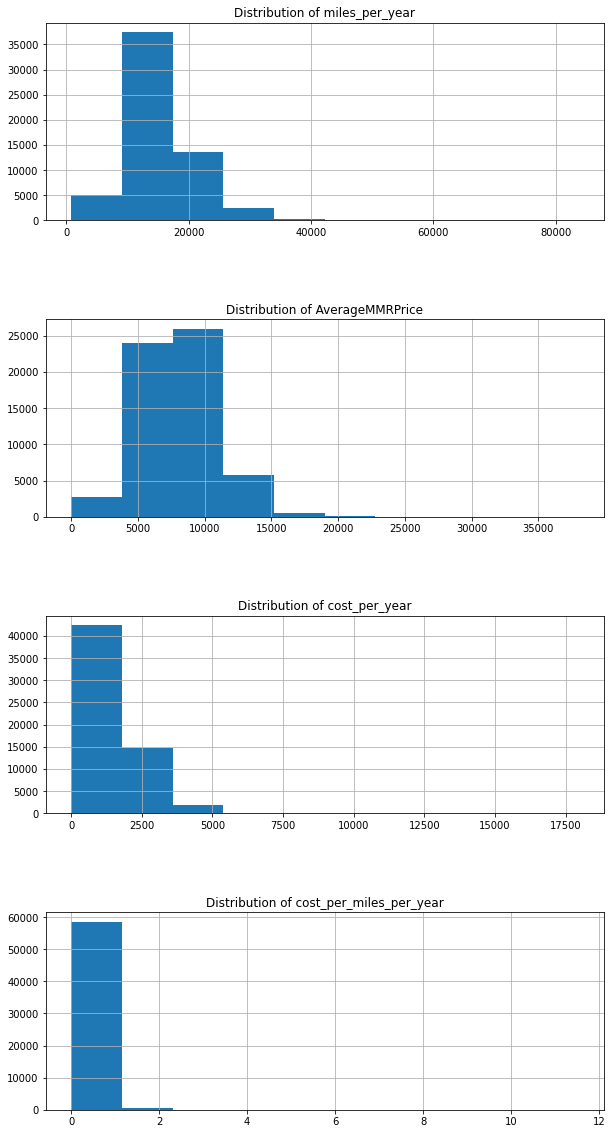

In [88]:
hist_list = ['miles_per_year', 'AverageMMRPrice', 'cost_per_year', 'cost_per_miles_per_year']
n_features = len(hist_list)
fig, axes = plt.subplots(n_features, 1, figsize=(10, 5 * n_features))  # Adjust size based on the number of subplots

plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(hist_list):
    df_feature_engine[col].hist(ax=axes[i])
    axes[i].set_title(f'Distribution of {hist_list[i]}')



Now you've created or deleted some new features and modified the training data. In order to be able to do the same with new data sets, you should copy the steps you performed into a function. Call this function `engineer_features`.


In [89]:
def engineer_features (df):
    """Add new Features to Dataframe.
    
    Add 'miles_per_year','cost_per_year', 'MMRPricePCA' and "VehAgePCA"
    
    Args:
        df (pd.DataFrame): Dataframe
    
    Returns:
        (pd.DataFrame) : Dataframe with new Features
    """  
    
    #Create 'miles_per_year' by dividing Odometer by Vehicle Age
    df['miles_per_year'] = df['VehOdo'] / (df['VehicleAge']+1)
    
    #Create "cost_per_year" by deviding VehBCost by VehicleAge
    df['cost_per_year'] = df["VehBCost"] / (df["VehicleAge"]+1)
    
    #Create 'cost_per_miles_per_year'
    df['cost_per_miles_per_year'] = df["VehBCost"] / df['miles_per_year']
    
    #sum up all MMR and extracting the averagePrice
    
    col_correlated= ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']
    
    df['AverageMMRPrice'] = df[col_correlated].mean(axis=1)
    
    #WheelType label encoden
    
    return df


### Feature selection


Selecting the right features is a good way to avoid *overfitting* and to improve your model overall. Less is more here.


Index(['Auction', 'VehYear', 'VehicleAge', 'Make', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'PurchYear', 'PurchMonth', 'PurchDay'],
      dtype='object')
['VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo', 'BYRNO', 'VehBCost', 'WarrantyCost', 'PurchYear', 'PurchMonth', 'PurchDay', 'MMRAcquisitonRetailCleanPrice', 'Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER', 'Color_BEIGE', 'Color_BLACK', 'Color_BLUE', 'Color_BROWN', 'Color_GOLD', 'Color_GREEN', 'Color_GREY', 'Color_MAROON', 'Color_NOT AVAIL', 'Color_ORANGE', 'Color_OTHER', 'Color_PU

<AxesSubplot:>

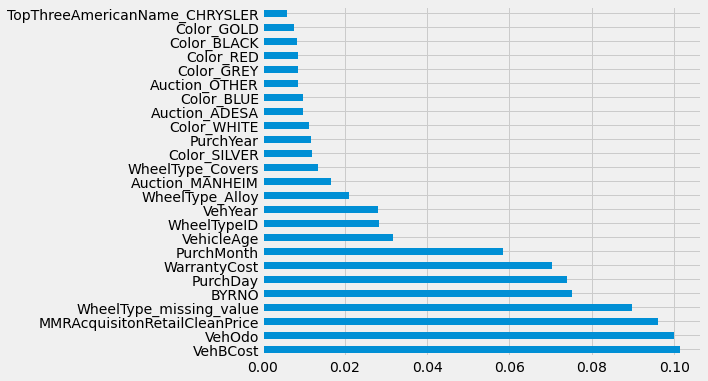

In [91]:
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize= (7,6))

model2_pipe.fit(X_train_clean,testing_pipeline_target_train)

model2 = model2_pipe.named_steps['model']
model_feature_importances = model2.feature_importances_


print(X_train_clean.columns)
categories = model2_pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].categories_

# Get the transformed column names for categorical features after one-hot encoding
transformed_cat_columns = [f'{col}_{val}' for col, cats in zip(cat_cols, categories) for val in cats]


columns_transformed = num_cols + transformed_cat_columns

print(columns_transformed)
                                      
feature_importances_sorted = pd.Series(data= model_feature_importances, index=columns_transformed)
feature_importances_sorted = feature_importances_sorted.sort_values(ascending=False)
feature_importances_sorted[:25].plot(kind= "barh")

In [92]:
feature_importance_heatmap_top25 = pd.DataFrame(feature_importances_sorted).loc[:, -25:]
print(type(feature_importance_heatmap_top25))
feature_importance_heatmap_top25 = feature_importance_heatmap_top25.columns.tolist()
print(type(feature_importance_heatmap_top25))

<class 'pandas.core.frame.DataFrame'>
<class 'list'>


In [94]:
#selecting the final feature
feature_selection = ['miles_per_year',
                     'cost_per_miles_per_year',
                     'cost_per_year',
                     'AverageMMRPrice',
                     'WarrantyCost',
                     'PurchDay',
                     'PurchMonth',
                     
                     'WheelType'
                    ]

### Model training


Now it's time to create and evaluate a model.



In [114]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [96]:
#useful imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report

First build a simple model and evaluate it to have a comparison value.


In [97]:
final_features_train= features_train.copy()
final_features_test= features_test.copy()
final_target_train= target_train.copy()
final_target_test= target_test.copy()

In [98]:
#applying the new features
X_train_clean_engined = clean_data(engineer_features(final_features_train))

X_test_clean_engined = engineer_features(final_features_test)
X_test_clean_engined = clean_data(X_test_clean_engined)


X_test_clean_engined.isna().sum()


Auction                                0
VehYear                                0
VehicleAge                             0
Make                                   0
Color                                  0
Transmission                           0
WheelTypeID                          269
WheelType                            269
VehOdo                                 0
Nationality                            0
Size                                   0
TopThreeAmericanName                   0
MMRAcquisitionAuctionAveragePrice      3
MMRAcquisitionAuctionCleanPrice        3
MMRAcquisitionRetailAveragePrice       3
MMRAcquisitonRetailCleanPrice          3
MMRCurrentAuctionAveragePrice         29
MMRCurrentAuctionCleanPrice           29
MMRCurrentRetailAveragePrice          29
MMRCurrentRetailCleanPrice            29
BYRNO                                  0
VNZIP1                                 0
VNST                                   0
VehBCost                               5
IsOnlineSale    

In [99]:
X_train_clean_engined

Auction  VehYear  VehicleAge       Make   Color Transmission  \
21430    OTHER     2004           5  CHEVROLET   GREEN         AUTO   
53433    OTHER     2007           2        KIA  SILVER         AUTO   
13278    OTHER     2006           3    PONTIAC   WHITE         AUTO   
29356  MANHEIM     2005           4        GMC    GREY         AUTO   
28157  MANHEIM     2007           3       FORD     RED         AUTO   
...        ...      ...         ...        ...     ...          ...   
37194  MANHEIM     2004           5     SATURN    GOLD       MANUAL   
6265   MANHEIM     2007           3  CHEVROLET    BLUE       MANUAL   
54886  MANHEIM     2005           5    HYUNDAI   WHITE         AUTO   
860    MANHEIM     2005           4     SATURN  SILVER         AUTO   
15795  MANHEIM     2007           2    PONTIAC    BLUE         AUTO   

       WheelTypeID WheelType  VehOdo  Nationality  ... VehBCost IsOnlineSale  \
21430          2.0    Covers   71041     AMERICAN  ...   4700.0            0   
53433          2.0    Covers   63941  OTHER ASIAN  ...   5255.0            0   
13278          1.0     Alloy   74180     AMERICAN  ...   7305.0            0   
29356          1.0     Alloy   61522     AMERICAN  ...   9300.0            0   
28157          1.0     Alloy   94153     AMERICAN  ...   6955.0            1   
...            ...       ...     ...          ...  ...      ...          ...   
37194          2.0    Covers   62029     AMERICAN  ...   4200.0            0   
6265           2.0    Covers   29314     AMERICAN  ...   5785.0            0   
54886          1.0     Alloy   81292  OTHER ASIAN  ...   5210.0            0   
860            2.0    Covers   60020     AMERICAN  ...   6480.0            0   
15795          1.0     Alloy   62619     AMERICAN  ...   8000.0            0   

       WarrantyCost  miles_per_year  cost_per_year  cost_per_miles_per_year  \
21430          4622    11840.166667     783.333333                 0.396954   
53433           533    21313.666667    1751.666667                 0.246555   
13278          1272    18545.000000    1826.250000                 0.393907   
29356          1020    12304.400000    1860.000000                 0.755827   
28157          1774    23538.250000    1738.750000                 0.295477   
...             ...             ...            ...                      ...   
37194           728    10338.166667     700.000000                 0.406262   
6265            582     7328.500000    1446.250000                 0.789384   
54886           853    13548.666667     868.333333                 0.384540   
860            1801    12004.000000    1296.000000                 0.539820   
15795          1703    20873.000000    2666.666667                 0.383270   

       AverageMMRPrice  PurchYear  PurchMonth  PurchDay  
21430         4803.375       2009           6         4  
53433         5012.125       2009           9        24  
13278         8190.375       2009           7        28  
29356         9867.500       2009           4        28  
28157        10209.750       2010          10        14  
...                ...        ...         ...       ...  
37194         5069.750       2009           6         3  
6265          7184.375       2010           6         2  
54886         6758.625       2010           6         1  
860           8499.750       2009           5        19  
15795         9694.750       2009           9        23  

[59058 rows x 33 columns]

In [100]:
X_test_clean_engineered = engineer_features(X_test_clean)
X_test_clean_engineered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6562 entries, 37974 to 54473
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Auction                            6562 non-null   category
 1   VehYear                            6562 non-null   int64   
 2   VehicleAge                         6562 non-null   int64   
 3   Make                               6562 non-null   category
 4   Color                              6562 non-null   category
 5   Transmission                       6562 non-null   category
 6   WheelTypeID                        6293 non-null   float64 
 7   WheelType                          6293 non-null   category
 8   VehOdo                             6562 non-null   int64   
 9   Nationality                        6562 non-null   category
 10  Size                               6562 non-null   category
 11  TopThreeAmericanName               656

In [101]:
# Create the param grid
search_space_rf = {'model__max_depth': range(8, 12, 2), #to much to handle, i guess
              'model__n_estimators': range(80, 90, 2)
             }
rf_grid = GridSearchCV(estimator = model2_pipe, 
                       param_grid = search_space_rf, 
                       cv = 2, #has to be reduce cause of the limited memory
                       scoring="f1", 
                       n_jobs = -1)


#dont forget the hyperparameter of the RandomForestClassifier class_weight='balanced', max_depth=12,
rf_grid


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('std_scaler',
                                                                                          StandardScaler()),
                                                                                         ('imputer',
                                                                                          KNNImputer())]),
                                                                         ['VehYear',
                                                                          'VehicleAge',
                                                                          'WheelTypeID',
                                                                          'VehOdo',
                                                                          'BYR

In [102]:
rf_grid.fit(X_train_clean, testing_pipeline_target_train)

print(rf_grid.best_estimator_)
#1.result n_estimators=82, random_state=42
#2.result n_estimators=86, max_depth=10, random_state=42
#SO there where 86 DecisionTrees in max depth, aka negativ height of the trees, for the best prediction

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   KNNImputer())]),
                                                  ['VehYear', 'VehicleAge',
                                                   'WheelTypeID', 'VehOdo',
                                                   'BYRNO', 'VehBCost',
                                                   'WarrantyCost', 'PurchYear',
                                                   'PurchMonth', 'PurchDay',
                                                   'MMRAcquisitonRetailCleanPrice']),
                                                 ('cat',
                                                  Pipelin

In [103]:
num_cols_final = ['miles_per_year',
                  'cost_per_miles_per_year',
                  'cost_per_year',
                  'AverageMMRPrice',
                  'WarrantyCost',
                  'PurchDay',
                  'PurchMonth',]

# liste aller categorischen spalten die du verwenden möchtest, 
#hier bitte nicht alle Features rein packen sondern eine vorauswahl treffen
cat_cols_final = ['WheelType']



# Define the preprocessing steps for numerical and categorical features

num_transformer = Pipeline(steps=[('std_scaler',StandardScaler()),
                                  ('imputer',KNNImputer(n_neighbors=5))
                                  #('poly_features',PolynomialFeatures(degree=2)),# zählt zum feature engineering
                                 ])

cat_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy="constant", fill_value="missing_value")),    
                                  ('onehot',OneHotEncoder(handle_unknown='ignore')),
                                 ])


preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols_final),
                                               ('cat', cat_transformer, cat_cols_final),
                                               #('pca', pca_transformer, pca_cols),
                                              ])

# Model Pipeline

model2_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(max_depth=10,
                                                               n_estimators=86,
                                                               random_state=42)),
                             ])

model2_pipe.fit(X_train_clean_engined, final_target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   KNNImputer())]),
                                                  ['miles_per_year',
                                                   'cost_per_miles_per_year',
                                                   'cost_per_year',
                                                   'AverageMMRPrice',
                                                   'WarrantyCost', 'PurchDay',
                                                   'PurchMonth']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
               

In [104]:
print(classification_report(final_target_train, model2_pipe.predict(X_train_clean_engined)))
print(classification_report(final_target_test, model2_pipe.predict(X_test_clean_engined)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     51800
           1       0.78      0.26      0.38      7258

    accuracy                           0.90     59058
   macro avg       0.84      0.62      0.66     59058
weighted avg       0.89      0.90      0.88     59058

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5716
           1       0.74      0.22      0.34       846

    accuracy                           0.89      6562
   macro avg       0.82      0.61      0.64      6562
weighted avg       0.88      0.89      0.86      6562



## The final data pipeline

You've cleaned and prepared the data and then trained a model on it. Now combine the respective steps in a function or pipeline that reads a data set and generates predictions for it. Don't delete data points from the test data. This could distort the model's estimated prediction quality.


In [124]:
def final_pipeline_test (features_train_param,
                         features_test_param, 
                         target_train_param,
                         target_test_param):
    #preparing the data
    features_train_engined = clean_data(engineer_features(features_train_param))
    features_test_engined = clean_data(engineer_features(features_test_param))
      
    
    num_cols_final = ['miles_per_year',
                      'cost_per_miles_per_year',
                      'cost_per_year',
                      'AverageMMRPrice',
                      'WarrantyCost',
                      'PurchDay',
                      'PurchMonth',
                     ]
    
    # liste aller categorischen spalten die du verwenden möchtest, 
    #hier bitte nicht alle Features rein packen sondern eine vorauswahl treffen
    cat_cols_final = ['WheelType']
    
    # Define the preprocessing steps for numerical and categorical features
    num_transformer = Pipeline(steps=[('std_scaler',StandardScaler()),
                                      ('imputer',KNNImputer(n_neighbors=5))
                                     ])
    
    cat_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy="constant", fill_value="missing_value")),
                                      ('onehot',OneHotEncoder(handle_unknown='ignore')),
                                     ])
    
    
    preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols_final),
                                                   ('cat', cat_transformer, cat_cols_final),
                                                  ])
    
    # Model Pipeline
    
    model2_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', RandomForestClassifier(max_depth=10,
                                                                   n_estimators=86,
                                                                   random_state=42)),
                                 ])
    
    model2_pipe.fit(features_train_engined, target_train_param)
    
    #print(classification_report(target_train, model2_pipe.predict(features_train_engined)))
    print(classification_report(target_test_param, model2_pipe.predict(features_test_engined)))
    
final_pipeline(features_train, features_test, target_train, target_test)

/tmp/ipykernel_72/3668486533.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['miles_per_year'] = df['VehOdo'] / (df['VehicleAge']+1)
/tmp/ipykernel_72/3668486533.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost_per_year'] = df["VehBCost"] / (df["VehicleAge"]+1)
/tmp/ipykernel_72/3668486533.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     51800
           1       0.78      0.26      0.38      7258

    accuracy                           0.90     59058
   macro avg       0.84      0.62      0.66     59058
weighted avg       0.89      0.90      0.88     59058

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5716
           1       0.74      0.22      0.34       846

    accuracy                           0.89      6562
   macro avg       0.82      0.61      0.64      6562
weighted avg       0.88      0.89      0.86      6562



In [110]:
def final_pipeline_aim (features_train_p, feature_aim_p, target_train_p):
    #preparing the data
    features_train_engined = clean_data(engineer_features(features_train))
    features_aim_engined = clean_data(engineer_features(features_aim))
      
    
    num_cols_final = ['miles_per_year',
                      'cost_per_miles_per_year',
                      'cost_per_year',
                      'AverageMMRPrice',
                      'WarrantyCost',
                      'PurchDay',
                      'PurchMonth',
                     ]
    
    # liste aller categorischen spalten die du verwenden möchtest, 
    #hier bitte nicht alle Features rein packen sondern eine vorauswahl treffen
    cat_cols_final = ['WheelType']
    
    # Define the preprocessing steps for numerical and categorical features
    num_transformer = Pipeline(steps=[('std_scaler',StandardScaler()),
                                      ('imputer',KNNImputer(n_neighbors=5))
                                     ])
    
    cat_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy="constant", fill_value="missing_value")),
                                      ('onehot',OneHotEncoder(handle_unknown='ignore')),
                                     ])
    
    
    preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols_final),
                                                   ('cat', cat_transformer, cat_cols_final),
                                                  ])
    
    # Model Pipeline
    
    model2_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', RandomForestClassifier(max_depth=10,
                                                                   n_estimators=86,
                                                                   random_state=42)),
                                 ])
    
    model2_pipe.fit(features_train_engined, target_train)
    
    return model2_pipe.predict(features_aim_engined)

**Congratulations**:
You now have a function that imports the data for you, prepares it and makes predictions directly. This will be very helpful for the buyers.


## Completing the project


The file *features_aim.csv* contains the features for your final prediction.
Save just your predicted values for `'IsBadBuy'` in a CSV file called 
`predictions_aim.csv`. According to your model, how many purchases in the target data should be avoided?


In [106]:
features_aim = pd.read_csv("features_aim.csv")

In [117]:
predictions_aim = final_pipeline_aim(features_train, features_aim, target_train)
predictions_aim = pd.DataFrame(predictions_aim)
display(predictions_aim.sum(), len(predictions_aim))

/tmp/ipykernel_72/3668486533.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['miles_per_year'] = df['VehOdo'] / (df['VehicleAge']+1)
/tmp/ipykernel_72/3668486533.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost_per_year'] = df["VehBCost"] / (df["VehicleAge"]+1)
/tmp/ipykernel_72/3668486533.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

0    285
dtype: int64

7292

In [118]:
predictions_aim.to_csv("predictions_aim.csv")

In [120]:
target_aim = pd.read_csv("target_aim.csv")
target_aim.sum()

IsBadBuy    863
dtype: int64

In [123]:
len(features_aim) == len(target_aim)

True

In [125]:
final_pipeline_test(features_train, features_aim, target_train, target_aim)

/tmp/ipykernel_72/3668486533.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['miles_per_year'] = df['VehOdo'] / (df['VehicleAge']+1)
/tmp/ipykernel_72/3668486533.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost_per_year'] = df["VehBCost"] / (df["VehicleAge"]+1)
/tmp/ipykernel_72/3668486533.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6429
           1       0.74      0.25      0.37       863

    accuracy                           0.90      7292
   macro avg       0.83      0.62      0.66      7292
weighted avg       0.89      0.90      0.88      7292



Text(36.1, 0.5, 'True Values')

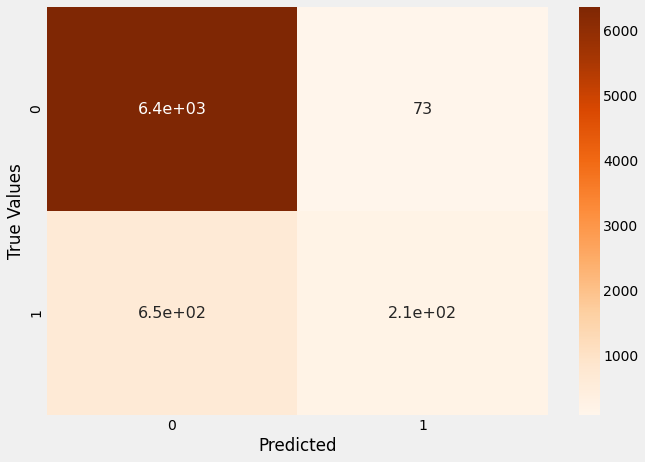

In [128]:
from sklearn.metrics import confusion_matrix
evaluating_matrix = confusion_matrix(target_aim, predictions_aim)

plt.figure(figsize = (10,7))
sns.heatmap(evaluating_matrix, cmap="Oranges", annot=True,annot_kws={"size": 16})# font size
plt.xlabel("Predicted")
plt.ylabel("True Values")

**Congratulations**:
You've completed another independent data science project! This means you're well equipped to implement projects independently and as part of a team!


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
